In [2]:
import os
import glob
import math
import time
from joblib import Parallel, delayed
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import KFold
import lightgbm as lgb
import warnings
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn
import random
import seaborn as sns; sns.set_theme()
import torch.nn.functional as F
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.api as sm
import pylab as pl
from matplotlib.pyplot import figure
from IPython import display
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
import umap
from sklearn import svm
from lightgbm import LGBMClassifier
from numpy import std
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import cm
from sklearn.metrics import confusion_matrix

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 300)

Load train and test data

# 1. Load data and preprocessing

## 1.1 Load train and test data

In [4]:
train = pd.read_csv('./MLR_Project_train.csv')
test = pd.read_csv('./MLR_Project_test.csv')

Show the data format and dimension

In [5]:
train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,TARGET
0,0,5874.524387,1072.671848,41440.76212,41440.23732,70.405148,7.392780,70.377281,23229.69262,23229.72655,70.378864,7.389173,70.380160,23229.76782,23379.81637,83.418623,11.615135,83.418623,23466.72590,23466.7259,83.418623,7.425618,70.494241,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,70.376262,4898.757333,15165.92759,297487.1654,297487.16540,15165.92759,4898.757333,70.376262,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,64.192982,20.940618,76.070270,23376.73707,23343.13291,77.290965,347.308164,102.380501,24823.08137,24120.94894,332.757607,17.386711,129.622187,23936.99077,21670.19233,71.518948,11.399004,78.006816,26437.161240,23811.09670,141.997532,22.474794,0.013314
1,1,6124.154099,1072.802927,41440.76212,41442.22458,70.456758,7.356050,70.379576,23229.76020,23230.10472,70.273618,7.389813,70.329906,23229.46908,23384.98219,83.418623,11.615135,83.418623,23466.72590,23466.7259,83.418623,7.441223,70.702624,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,70.376262,5100.350569,15788.07683,308790.4312,308790.43120,15788.07683,5100.350569,70.376262,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,2.937218,-14.428210,75.204973,23317.46049,23309.42032,74.880368,689.670872,127.070357,36746.26762,31012.79786,-310.576721,4.532673,-47.045260,22053.23653,14626.73339,48.124991,-99.618253,-115.120518,7705.543821,22665.35143,-377.287072,-73.700375,-0.000448
2,2,5905.732593,1072.802927,41443.14358,41442.30403,70.422472,7.417794,70.376448,23229.48142,23229.61008,70.474265,7.388979,70.397301,23229.83396,23387.39168,83.418623,11.615135,83.418623,23466.72590,23466.7259,83.418623,7.440201,70.686178,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,70.376262,5308.548086,16430.60795,320463.9968,320463.99680,16430.60795,5308.548086,70.376262,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,141.231442,25.855392,75.184756,23248.26780,23307.91084,74.635569,634.523047,71.705965,28917.00549,24632.17456,419.071308,7.403187,118.846496,23430.24573,31251.55292,71.535567,53.482719,106.179152,37586.677270,23251.62576,261.098973,22.565621,0.000244
3,3,6029.325221,1072.802927,41440.76212,41442.25682,70.458533,7.366031,70.379221,23230.08433,23229.87971,70.288944,7.390120,70.370247,23229.81662,23390.02296,83.418623,11.615135,83.418623,23233.34325,23466.7259,83.418623,7.439191,70.692085,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,70.376262,5510.265781,17053.14128,331774.2409,75710.89648,17053.14128,5510.265781,70.376262,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,-1.580478,-7.499746,75.184756,23248.26836,23307.91084,74.635569,583.001082,70.384022,25642.94219,23482.26269,-249.671869,7.388974,49.809681,23193.67720,15867.01579,70.369496,-12.169114,63.930236,10052.351290,23229.64352,-10.549985,4.656636,-0.000628
4,4,6142.360146,1072.802927,41443.14358,41442.46480,70.413623,7.411287,70.376788,23229.70975,23229.82255,70.467206,7.389910,70.386986,23229.87603,23392.66710,70.572881,11.615135,83.418623,23466.72590,23466.7259,83.418623,7.438244,70.680386,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,70.376262,1152.667997,17699.01445,343508.5253,343508.52530,17699.01445,5719.546213,70.376262,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,149.144800,26.789196,74.904988,23229.77108,23260.32245,70.506980,566.549008,120.694073,25765.82131,24618.79392,363.188022,7.389057,78.826922,23235.86490,31790.06425,120.694068,42.971377,145.572170,37109.895810,24143.94971,188.639704,31.863254,0.003811


In [6]:
test.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,TARGET
0,0,16335.49448,1061.530132,41238.33840,41237.30921,70.432910,7.379175,70.376460,23229.86828,23229.78910,70.397639,7.389850,70.389234,23229.90881,25602.51370,70.835039,7.537712,70.835039,23235.72471,23235.72471,70.703960,7.467846,70.433077,23230.96180,23278.59091,70.835039,7.537712,70.441802,23238.10616,23235.72471,70.703960,7133.700113,22063.32144,422799.6647,232518.5574,11589.95489,3740.045136,1860.710635,4138543.879,422799.6647,22063.32144,137.249904,66395.12033,232518.5574,232518.5574,258.079242,30.226219,75.913405,23229.77107,23229.83301,70.376262,1473.581679,71.758838,23874.69807,23499.73762,-155.498907,7.389056,70.371005,23229.77106,12139.388420,71.758829,14.703740,84.826620,8035.667142,23254.88967,92.945298,12.071364,0.010438
1,1,13166.20458,1061.661211,41238.33840,41238.66844,70.394428,7.378583,70.391576,23229.87463,23230.21191,70.288403,7.392921,70.343310,23229.64193,25607.58558,70.572881,7.452766,70.572881,23240.48762,23240.48762,70.966118,7.469469,70.576552,23230.96180,23235.72471,70.572881,7.452766,70.572881,23280.97236,23240.48762,70.966118,3945.011279,12222.51346,244010.9410,434292.0482,22695.88002,7338.666257,139.167102,1239716.334,244010.9410,12222.51346,792.472120,227216.19080,434292.0482,434292.0482,-147.808334,-20.702534,76.035317,23313.93717,23332.97615,75.852147,1828.336140,140.129854,37438.79508,30329.40335,167.006374,16.564437,34.929416,23264.53239,39398.972520,84.750309,60.805885,155.880284,41154.557460,24005.38063,199.782364,35.714646,-0.000532
2,2,12897.58082,1061.661211,41240.71985,41238.89069,70.476942,7.400935,70.375313,23229.84429,23229.89405,70.469979,7.391477,70.407134,23230.09254,25610.09095,70.572881,7.580185,70.966118,23233.34325,23233.34325,70.572881,7.470161,70.605117,23233.34325,23280.97236,70.966118,7.580185,70.441802,23235.72471,23233.34325,70.572881,995.797053,23323.37355,445692.4097,255411.3025,12850.00699,4148.336212,3120.762743,4161436.624,445692.4097,23323.37355,233.004088,67655.17244,255411.3025,255411.3025,289.867668,32.185249,75.966899,23326.54724,23327.60253,75.649862,1924.171252,111.147939,37691.96604,29511.34868,53.482595,13.727445,165.790143,24499.54560,7180.863302,74.919427,-22.153780,54.137349,6873.937564,23667.70306,74.616186,24.773579,0.000726
3,3,12887.42863,1061.661211,41238.33840,41239.00250,70.412815,7.378490,70.377339,23229.91979,23229.86689,70.283757,7.389189,70.359007,23229.67957,25612.79171,70.572881,7.452766,70.572881,23233.34325,23240.48762,70.966118,7.469667,70.602493,23230.96180,23235.72471,70.572881,7.452766,70.572881,23280.97236,23240.48762,70.966118,4329.804019,13410.04591,265586.1421,88824.3188,23883.41247,7723.458997,1326.699554,1261291.535,265586.1421,13410.04591,1177.264861,228403.72320,455867.2494,455867.2494,-141.955445,-15.581110,75.883198,23230.50078,23310.57289,73.052689,1808.877007,123.263599,31327.33150,25876.72169,86.016065,7.327061,26.252334,22958.21980,39599.779840,122.820383,46.190366,145.600464,39883.925250,24179.10475,145.999434,26.920634,0.001459
4,4,11994.73779,1061.661211,41240.71985,41238.81077,70.481341,7.392913,70.385266,23229.57329,23229.79297,70.450114,7.390389,70.377065,23229.74335,25615.17798,70.572881,7.580185,70.966118,23233.34325,23233.34325,70.572881,7.469671,70.607659,23233.34325,23280.97236,70.966118,7.580185,70.441802,23235.72471,23233.34325,70.572881,1408.908041,24598.30068,468855.4055,278574.2983,14124.93413,4561.447200,4395.689873,4184599.619,468855.4055,24598.30068,175.464314,68930.09957,278574.2983,278574.2983,276.189378,21.701184,76.055710,23354.81165,23345.67063,77.102636,1906.984098,598.329736,40066.97972,36345.65544,-605.228200,-132.958333,-529.575904,12869.21582,6244.418503,-23.787704,-46.168214,-57.984418,-6030.026819,13649.75983,-694.862277,-218.983324,-0.001462


## 1.2 Check whether Nan exist in data

In [7]:
train_sum = train.isnull().sum().sum()
test_sum = test.isnull().sum().sum()

if train_sum == 0 and test_sum == 0:
    print('No Nan exist either in training or testing dataset')
elif train_sum != 0 and test_sum == 0:
    print('Nan exist in train dataset, no Nan exist in test dataset')
elif train_sum == 0 and test_sum != 0:
    print('No Nan exist in train dataset, Nan exist in test dataset')
else:
    print('Nan exist both in training and testing dataset')

No Nan exist either in training or testing dataset


## 1.3 Show the maximum return of train and test

In [8]:
train_max = np.sum(train['TARGET'][train['TARGET']>0])
test_max = np.sum(test['TARGET'][test['TARGET']>0])

print('Maximum return of training set:', train_max)
print('Maximum return of testing set:', test_max)

Maximum return of training set: 195.6927566509
Maximum return of testing set: 55.96225182400002


### 1.3.1 Remove the Unnamed columns in dataframe

In [9]:
train = train.loc[:, ~train.columns.str.contains('^Unnamed')]
test = test.loc[:, ~test.columns.str.contains('^Unnamed')]

## 1.4 Naive random selection experiment

In [10]:
train_random = 0
for j in range(10000):
    ind = np.random.randint(2, size=train.shape[0])
    train_random = train_random + sum(train['TARGET'][ind>0])

print('Result of train naive random selection:', train_random/10000)

test_random = 0
for j in range(10000):
    ind = np.random.randint(2, size=test.shape[0])
    test_random = test_random + sum(test['TARGET'][ind>0])

print('Result of test naive random selection:', test_random/10000)


Result of train naive random selection: -0.800508443488163
Result of test naive random selection: -0.6503542819088626


In [12]:
print(f'Train naive random selection percentage return: {train_random/train_max/100}%')
print(f'Test naive random selection percentage return: {test_random/test_max/100}%')

Train naive random selection percentage return: -0.40906391078960835%
Test naive random selection percentage return: -1.1621302944602938%


## 1.5 Get data shape

In [13]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (90000, 67)
Test shape: (19707, 67)


# 2. First look of each individual features and individual feature regression

## 2.1 Linear regresion between each feature and target

[[4, 0.004169898094755986], [59, 0.0006131589690051564], [61, 0.00036054543258934313], [24, 0.0002982926838521749], [25, 0.00022393304985690587], [60, 0.0002191133295718073], [22, 0.00019048891060402529], [9, 0.00016768933439004208], [26, 0.00015870531851835956], [45, 0.00015473891028894293], [63, 0.00011447796634700413], [23, 0.00011133921295325422], [65, 7.589591275003471e-05], [52, 7.035240359176687e-05], [54, 6.483485496988628e-05], [53, 5.680651262995884e-05], [5, 5.2584072685490924e-05], [29, 4.816293848408648e-05], [43, 4.594618947162399e-05], [20, 4.371833604388531e-05], [50, 4.141827971093637e-05], [28, 4.1154447634528246e-05], [0, 3.952593916545233e-05], [62, 3.45404190966736e-05], [64, 2.9656984479764503e-05], [6, 2.5837015287133447e-05], [11, 2.367933762115193e-05], [39, 2.1880440999821893e-05], [51, 2.1349722806207616e-05], [37, 2.0108986474753898e-05], [27, 1.968748816272292e-05], [21, 1.8285698485054347e-05], [35, 1.804159479823486e-05], [33, 1.6649737732854497e-05], [13

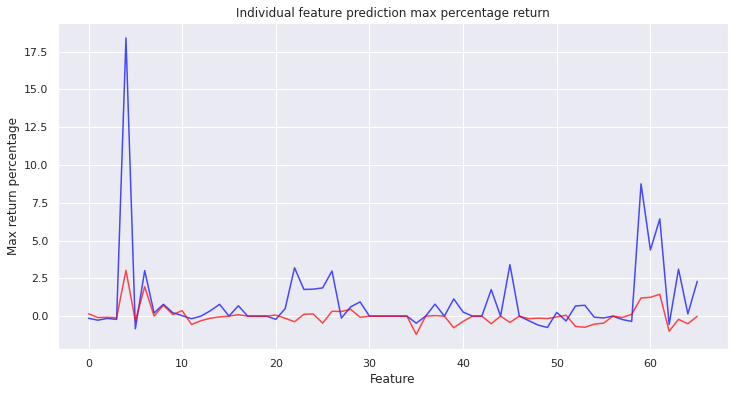

In [14]:
res_r2 = []
train_results = []
test_results = []
features = []
for i in range(66):
    reg = LinearRegression().fit(pd.DataFrame(train.iloc[:, i]), train['TARGET'])
    pred = reg.predict(pd.DataFrame(train.iloc[:, i]))
    train_linear_score = reg.score(pd.DataFrame(train.iloc[:, i]),  train['TARGET'])
    res_r2.append([i, train_linear_score])

    pred_test = reg.predict(pd.DataFrame(test.iloc[:, i]))
    train_res = np.sum(train['TARGET'][pred>0])
    test_res = np.sum(test['TARGET'][pred_test>0])
    features.append(i)
    train_results.append(train_res)
    test_results.append(test_res)
#     print('Feature', i, 'Train max percentage return:', train_res/train_max, '   ', 'Test max percentage return:', test_res/test_max)
                      
res_r2.sort(reverse=True, key = lambda x: x[1])
print(res_r2)

fig, ax = plt.subplots(1, 1, figsize = (12, 6))
ax.plot(features, train_results, alpha=0.7, c = 'blue')
ax.plot(features, test_results, alpha=0.7, c = 'red')

ax.set_title('Individual feature prediction max percentage return')
ax.set_xlabel('Feature')
ax.set_ylabel('Max return percentage')

fig.savefig("individual_feature_models.png", bbox_inches='tight', dpi=600)

### Check whether nan exist in train and test dataset. If nan exist, the sum will be nan. First sum() sums each column and the second sum() sums the sum result of all columns.

## 2.2 Plot each feature of the train dataset

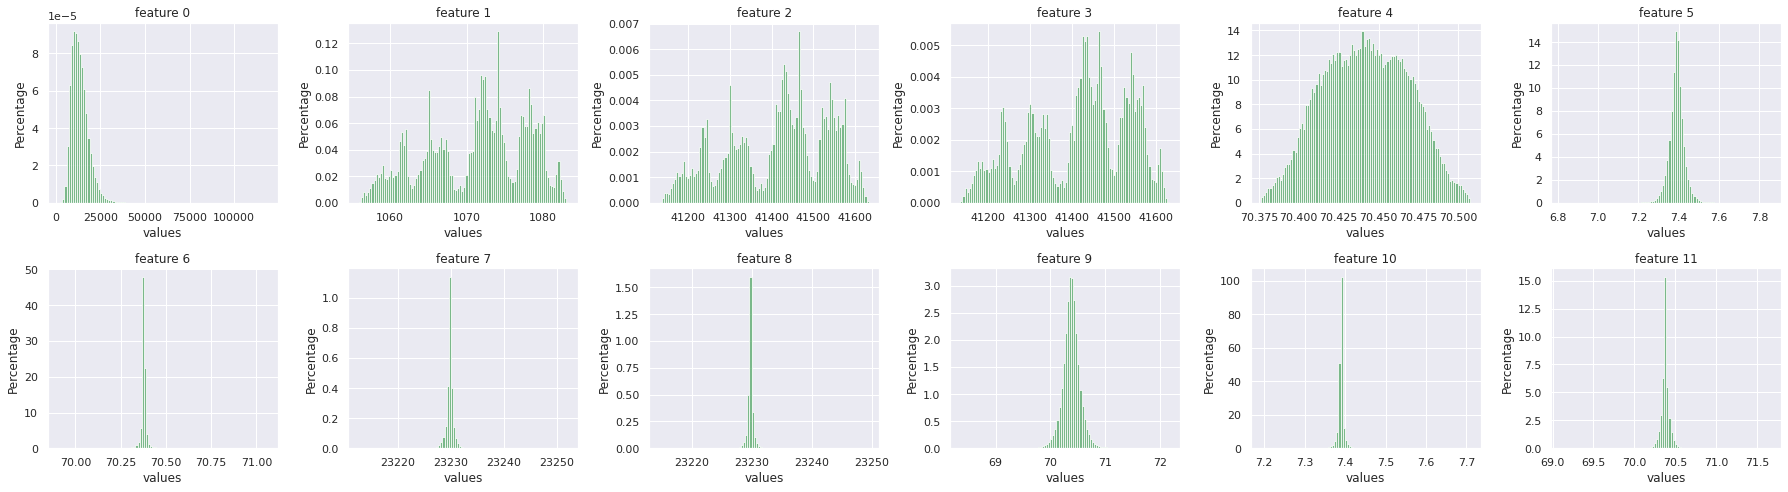

In [13]:
fig, ax = plt.subplots(2, 6, figsize = (25, 7))
# fig.tight_layout()
ax = ax.flatten()
for i in range(12):
    n, bins, patches = ax[i].hist(train.iloc[:, i], 100, density=True, facecolor='g', alpha=0.75)
    ax[i].set_title('feature ' + train.iloc[:, i].name)
    ax[i].set_xlabel('values')
    ax[i].set_ylabel('Percentage')
fig.tight_layout()
plt.show()

fig.savefig("features_raw_dis.png", bbox_inches='tight', dpi=600)

## 2.3 Train data target values distribution

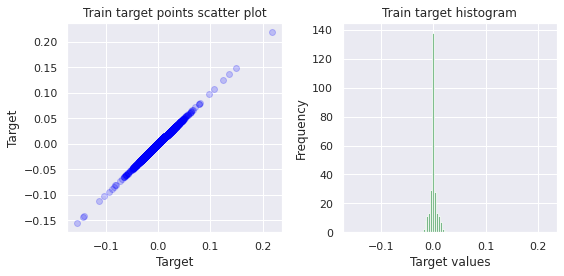

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
ax[0].scatter(train['TARGET'], train['TARGET'], alpha=0.2, c = 'blue')
ax[0].set_title('Train target points scatter plot')
ax[0].set_xlabel('Target')
ax[0].set_ylabel('Target')

n, bins, patches = ax[1].hist(train['TARGET'], 100, density=True, facecolor='g', alpha=0.75)
ax[1].set_title('Train target histogram')
ax[1].set_xlabel('Target values')
ax[1].set_ylabel('Frequency')
fig.tight_layout()
fig.savefig("target_raw_dist.png", bbox_inches='tight', dpi=600)

### 2.4 Baseline linear regression (all features) for return regression

R^2: 0.006802248202899763
Maximum sum train return 23.467011220499998, Total train return: 195.6927566509, Maximum train percentage return: 11.991762813359127%
Maximum sum test return 3.6217155992, Total test return: 55.96225182400002, Maximum test percentage return: 6.471711700576687%


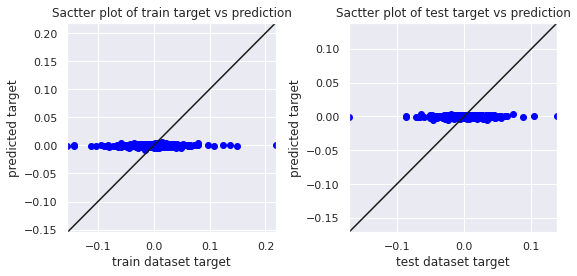

In [15]:
reg = LinearRegression().fit(train.iloc[:, 0:66], train['TARGET'])
pred = reg.predict(train.iloc[:, 0:66])
train_linear_score = reg.score(train.iloc[:, 0:66],  train['TARGET'])
print('R^2:', train_linear_score)

pred_test = reg.predict(test.iloc[:, 0:66])

train_res = np.sum(train['TARGET'][pred>0])
test_res = np.sum(test['TARGET'][pred_test>0])

print(f'Maximum sum train return {train_res}, Total train return: {train_max}, Maximum train percentage return: {train_res/train_max*100}%')
print(f'Maximum sum test return {test_res}, Total test return: {test_max}, Maximum test percentage return: {test_res/test_max*100}%')

fig, ax = plt.subplots(1, 2, figsize = (8, 4))

max_value = max(max(train['TARGET']), max(pred))
min_value = min(min(train['TARGET']), min(pred))
ax[0].scatter(train['TARGET'], pred, c = 'blue')
ax[0].plot([min_value, max_value], [min_value, max_value], 'k-')
ax[0].set_xlim([min_value, max_value])
ax[0].set_ylim([min_value, max_value])
ax[0].set_xlabel('train dataset target')
ax[0].set_ylabel('predicted target')
ax[0].set_title('Sactter plot of train target vs prediction')

max_value = max(max(test['TARGET']), max(pred_test))
min_value = min(min(test['TARGET']), min(pred_test))
ax[1].scatter(test['TARGET'], pred_test, c = 'blue')
ax[1].plot([min_value, max_value], [min_value, max_value], 'k-')
ax[1].set_xlim([min_value, max_value])
ax[1].set_ylim([min_value, max_value])
ax[1].set_xlabel('test dataset target')
ax[1].set_ylabel('predicted target')
ax[1].set_title('Sactter plot of test target vs prediction')
fig.tight_layout()
plt.show()

fig.savefig("baseline_model.png", bbox_inches='tight', dpi=600)

# 3. Data analyze and processing

## 3.1 Remove extreme Target values

In [16]:
train = train.sort_values(by=['TARGET'])
# remove samples with extreme large target values and samples with extreme negative values
num_remove = 10
train_remove = train.iloc[num_remove:-num_remove, :]
# train.shape

Maximum sum train return 24.017523804499987, Total train return: 195.6927566509, Maximum train percentage return: 12.273077560732256%
Maximum sum test return 3.5086730271999995, Total test return: 55.96225182400002, Maximum test percentage return: 6.269713803216308%


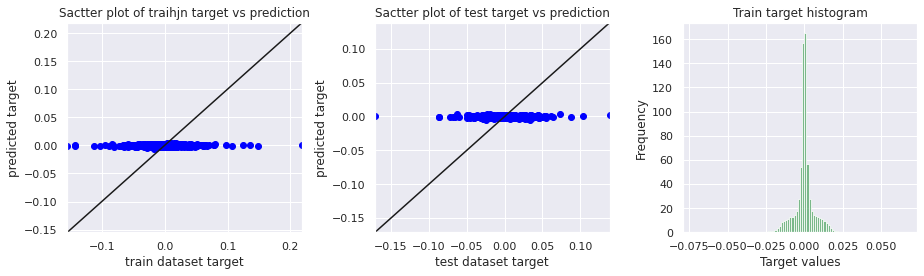

In [17]:
reg = LinearRegression().fit(train_remove.iloc[:, 0:66], train_remove['TARGET'])
pred = reg.predict(train.iloc[:, 0:66])
# train_linear_score = reg.score(train.iloc[:, 0:66],  train['TARGET'])
# print('R^2:', train_linear_score)

pred_test = reg.predict(test.iloc[:, 0:66])

train_res = np.sum(train['TARGET'][pred>0])
test_res = np.sum(test['TARGET'][pred_test>0])

print(f'Maximum sum train return {train_res}, Total train return: {train_max}, Maximum train percentage return: {train_res/train_max*100}%')
print(f'Maximum sum test return {test_res}, Total test return: {test_max}, Maximum test percentage return: {test_res/test_max*100}%')

fig, ax = plt.subplots(1, 3, figsize = (13, 4))

max_value = max(max(train['TARGET']), max(pred))
min_value = min(min(train['TARGET']), min(pred))

ax[0].scatter(train['TARGET'], pred, c = 'blue')
ax[0].plot([min_value, max_value], [min_value, max_value], 'k-')
ax[0].set_xlim([min_value, max_value])
ax[0].set_ylim([min_value, max_value])
ax[0].set_xlabel('train dataset target')
ax[0].set_ylabel('predicted target')
ax[0].set_title('Sactter plot of traihjn target vs prediction')

max_value = max(max(test['TARGET']), max(pred_test))
min_value = min(min(test['TARGET']), min(pred_test))

ax[1].scatter(test['TARGET'], pred_test, c = 'blue')
ax[1].plot([min_value, max_value], [min_value, max_value], 'k-')
ax[1].set_xlim([min_value, max_value])
ax[1].set_ylim([min_value, max_value])
ax[1].set_xlabel('test dataset target')
ax[1].set_ylabel('predicted target')
ax[1].set_title('Sactter plot of test target vs prediction')

n, bins, patches = ax[2].hist(train_remove['TARGET'], 100, density=True, facecolor='g', alpha=0.75)
ax[2].set_title('Train target histogram')
ax[2].set_xlabel('Target values')
ax[2].set_ylabel('Frequency')

fig.tight_layout()

plt.show()


fig.savefig("baseline_extre_target_remove.png", bbox_inches='tight', dpi=600)

### Conclusion: peroformance improved after remove extreme target values

## 3.2 Remove extreme features values

In [18]:
for i in range(train.shape[1]-1):
    train_remove = train_remove.sort_values(by=[str(i)])
    num_remove = 5
    train_remove = train_remove.iloc[num_remove:-num_remove, :]

In [19]:
train_remove.shape

(89320, 67)

Maximum sum train return 25.099729833499993, Total train return: 195.6927566509, Maximum train percentage return: 12.826090379152802%
Maximum sum test return 3.6175065341999995, Total test return: 55.96225182400002, Maximum test percentage return: 6.464190443188336%


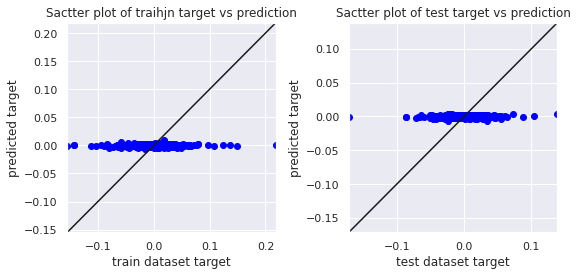

In [20]:
reg = LinearRegression().fit(train_remove.iloc[:, 0:66], train_remove['TARGET'])
pred = reg.predict(train.iloc[:, 0:66])
# train_linear_score = reg.score(train.iloc[:, 0:66],  train['TARGET'])
# print('R^2:', train_linear_score)

pred_test = reg.predict(test.iloc[:, 0:66])

train_res = np.sum(train['TARGET'][pred>0])
test_res = np.sum(test['TARGET'][pred_test>0])

print(f'Maximum sum train return {train_res}, Total train return: {train_max}, Maximum train percentage return: {train_res/train_max*100}%')
print(f'Maximum sum test return {test_res}, Total test return: {test_max}, Maximum test percentage return: {test_res/test_max*100}%')

fig, ax = plt.subplots(1, 2, figsize = (8, 4))

max_value = max(max(train['TARGET']), max(pred))
min_value = min(min(train['TARGET']), min(pred))

ax[0].scatter(train['TARGET'], pred, c = 'blue')
ax[0].plot([min_value, max_value], [min_value, max_value], 'k-')
ax[0].set_xlim([min_value, max_value])
ax[0].set_ylim([min_value, max_value])
ax[0].set_xlabel('train dataset target')
ax[0].set_ylabel('predicted target')
ax[0].set_title('Sactter plot of traihjn target vs prediction')

max_value = max(max(test['TARGET']), max(pred_test))
min_value = min(min(test['TARGET']), min(pred_test))

ax[1].scatter(test['TARGET'], pred_test, c = 'blue')
ax[1].plot([min_value, max_value], [min_value, max_value], 'k-')
ax[1].set_xlim([min_value, max_value])
ax[1].set_ylim([min_value, max_value])
ax[1].set_xlabel('test dataset target')
ax[1].set_ylabel('predicted target')
ax[1].set_title('Sactter plot of test target vs prediction')
fig.tight_layout()

fig.savefig("baseline_extre_features_remove.png", bbox_inches='tight', dpi=600)

### Conclusion: by removing 10 extreme high and 10 extreme low values, both train and test dataset performance improved

## 3.3 Plot each feature of the train dataset after removing extreme values

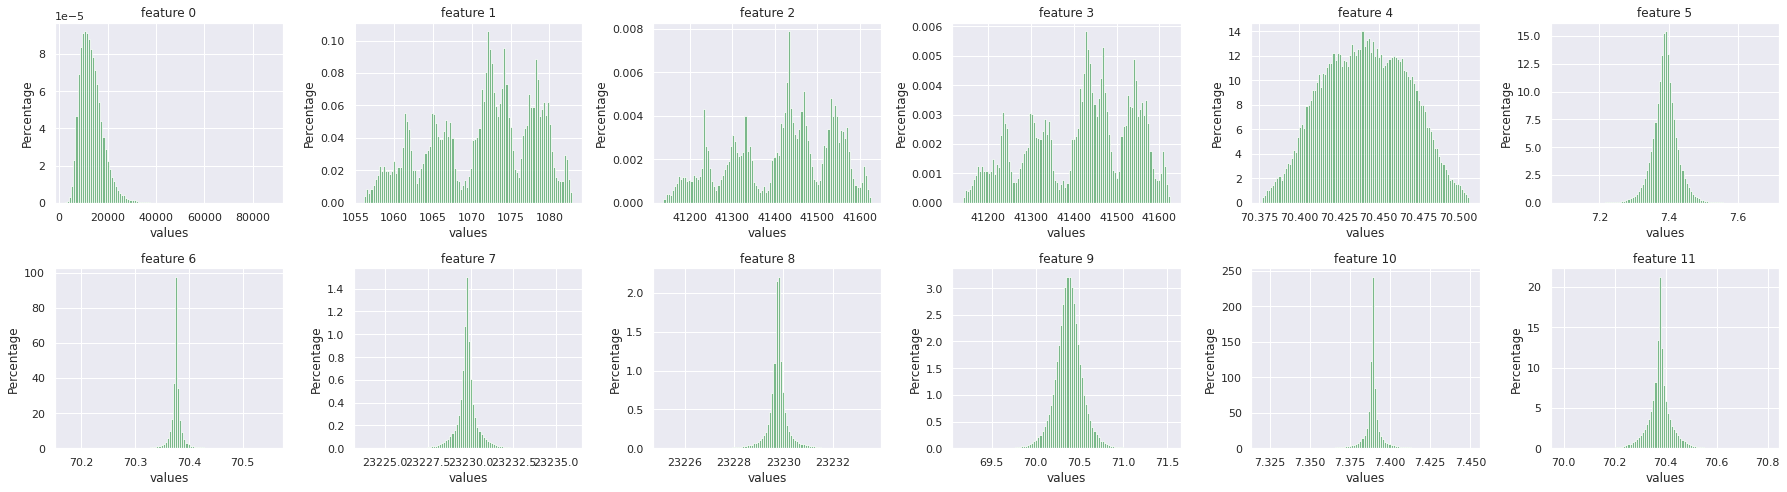

In [21]:
fig, ax = plt.subplots(2, 6, figsize = (25, 7))
# fig.tight_layout()
ax = ax.flatten()
for i in range(12):
    n, bins, patches = ax[i].hist(train_remove.iloc[:, i], 100, density=True, facecolor='g', alpha=0.75)
    ax[i].set_title('feature ' + train.iloc[:, i].name)
    ax[i].set_xlabel('values')
    ax[i].set_ylabel('Percentage')
fig.tight_layout()
plt.show()

fig.savefig("features_extre_remove_dis.png", bbox_inches='tight', dpi=600)

## 3.4 Compare results between simple linear regression, ridge regression, lasso regression

In [22]:
train_result = pd.DataFrame()
test_result = pd.DataFrame()

In [23]:
# simple lleast square linear regression
# train
reg = LinearRegression().fit(train_remove.iloc[:, 0:66], train_remove.iloc[:, 66])
pred = reg.predict(train.iloc[:, 0:66])
# train_linear_score = reg.score(train_remove.iloc[:, 0:66], train_remove.iloc[:, 66])
train_result['train_simple_least_square_linear'] = pred
# test
pred_test = reg.predict(test.iloc[:, 0:66])
# test_linear_score = reg.score(test.iloc[:, 0:66], test.iloc[:, 66])
test_result['test_simple_least_square_linear'] = pred_test

train_res = np.sum(train['TARGET'][pred>0])
test_res = np.sum(test['TARGET'][pred_test>0])

print('Simple least square linear regression')
print(f'Maximum sum train return {train_res}, Total train return: {train_max}, Maximum train percentage return: {train_res/train_max*100}%')
print(f'Maximum sum test return {test_res}, Total test return: {test_max}, Maximum test percentage return: {test_res/test_max*100}%')

# ridge regression
# train
reg = Ridge(alpha=0.5)
reg.fit(train_remove.iloc[:, 0:66], train_remove.iloc[:, 66])
pred = reg.predict(train.iloc[:, 0:66])
# train_ridge_score = reg.score(train_remove.iloc[:, 0:66], train_remove.iloc[:, 66])
train_result['train_ridge_regression'] = pred
# test
pred_test = reg.predict(test.iloc[:, 0:66])
# test_ridge_score = reg.score(test.iloc[:, 0:66], test.iloc[:, 66])
test_result['test_ridge_regression'] = pred_test

train_res = np.sum(train['TARGET'][pred>0])
test_res = np.sum(test['TARGET'][pred_test>0])
print()
print('Ridge regression')
print(f'Maximum sum train return {train_res}, Total train return: {train_max}, Maximum train percentage return: {train_res/train_max*100}%')
print(f'Maximum sum test return {test_res}, Total test return: {test_max}, Maximum test percentage return: {test_res/test_max*100}%')

# lasso regression
# train
reg = Lasso(alpha=0.000000000001)
reg.fit(train_remove.iloc[:, 0:66], train_remove.iloc[:, 66])
pred = reg.predict(train.iloc[:, 0:66])
# train_lasso_score = reg.score(train_remove.iloc[:, 0:66], train_remove.iloc[:, 66])
train_result['train_lasso'] = pred
# test
pred_test = reg.predict(test.iloc[:, 0:66])
# test_lasso_score = reg.score(test.iloc[:, 0:66], test.iloc[:, 66])
test_result['test_lasso'] = pred_test

train_res = np.sum(train['TARGET'][pred>0])
test_res = np.sum(test['TARGET'][pred_test>0])
print()
print('Lasso regression')
print(f'Maximum sum train return {train_res}, Total train return: {train_max}, Maximum train percentage return: {train_res/train_max*100}%')
print(f'Maximum sum test return {test_res}, Total test return: {test_max}, Maximum test percentage return: {test_res/test_max*100}%')

# print()
# print('train linear regression score:', train_linear_score)
# print('train ridge regression score:', train_ridge_score)
# print('train lasso regressio score:', train_lasso_score)
# print()
# print('test linear regression score:', test_linear_score)
# print('test ridge regression score:', test_ridge_score)
# print('test lasso regressio score:', test_lasso_score)


Simple least square linear regression
Maximum sum train return 25.099729833499993, Total train return: 195.6927566509, Maximum train percentage return: 12.826090379152802%
Maximum sum test return 3.6175065341999995, Total test return: 55.96225182400002, Maximum test percentage return: 6.464190443188336%

Ridge regression
Maximum sum train return 25.3418820475, Total train return: 195.6927566509, Maximum train percentage return: 12.949831399589234%
Maximum sum test return 3.7000636622, Total test return: 55.96225182400002, Maximum test percentage return: 6.611713327470478%

Lasso regression
Maximum sum train return 25.193854730499993, Total train return: 195.6927566509, Maximum train percentage return: 12.874188683152838%
Maximum sum test return 3.5628367122, Total test return: 55.96225182400002, Maximum test percentage return: 6.366499910341418%


### Conclusion: Ridge regression could improve max sum return, lasso doesnt improve performance

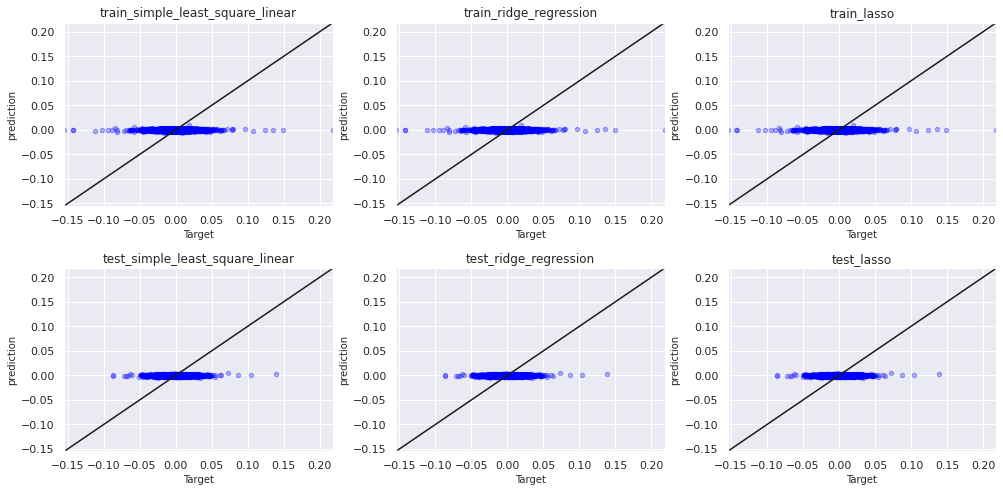

In [24]:
train_column_names = list(train_result.columns)
test_column_names = list(test_result.columns)

colors = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']

figure, ax = plt.subplots(2, 3, figsize = (14, 7))
ax = ax.flatten()
for i in range(3):
    max_value = max(max(train_result.iloc[:, i]), max(train.iloc[:, 66]))
    min_value = min(min(train_result.iloc[:, i]), min(train.iloc[:, 66]))
    ax[i].scatter(train.iloc[:, 66], train_result.iloc[:, i], s = 20, alpha=0.3, c='blue')
    ax[i].plot([min_value, max_value], [min_value, max_value], 'k-')
    ax[i].set_xlim([min_value, max_value])
    ax[i].set_ylim([min_value, max_value])
    ax[i].set_title(train_column_names[i])
    ax[i].set_xlabel('Target', fontsize=10)
    ax[i].set_ylabel('prediction', fontsize=10)
for i in range(3, 6):
    max_value = max(max(test_result.iloc[:, i-3]), max(train.iloc[:, 66]))
    min_value = min(min(test_result.iloc[:, i-3]), min(train.iloc[:, 66]))
    ax[i].scatter(test.iloc[:, 66], test_result.iloc[:, i-3], s = 20, alpha=0.3, c='blue')
    ax[i].plot([min_value, max_value], [min_value, max_value], 'k-')
    ax[i].set_xlim([min_value, max_value])
    ax[i].set_ylim([min_value, max_value])
    ax[i].set_title(test_column_names[i-3])
    ax[i].set_xlabel('Target', fontsize=10)
    ax[i].set_ylabel('prediction', fontsize=10)
figure.tight_layout()

figure.savefig("simple_ridge_lasso_comp.png", bbox_inches='tight', dpi=600)

### Conclusion: Linear model could not capture the expected return value

### 3.5 Try the Light Gradient Boosting

In [25]:
def train_and_evaluate(train, test):
    
    train_x = train.drop(['TARGET'], axis = 1)
    train_y = (np.sign(train['TARGET'])+1)//2
    test_x = test.drop(['TARGET'], axis = 1)
    test_y = (np.sign(test['TARGET'])+1)//2
    
#     train_x = train.drop(['TARGET'], axis = 1).to_numpy()
#     train_y = ((np.sign(train['TARGET'])+1)//2).to_numpy()
#     train_data = lgb.Dataset(train_x, label=train_y)
    
#     test_x = test.drop(['TARGET'], axis = 1).to_numpy()
#     test_y = ((np.sign(test['TARGET'])+1)//2).to_numpy()
#     test_data = lgb.Dataset(test_x, label=test_y)
    
# #     param = {'num_leaves': 60, 'objective': 'binary'}
#     param = {
#       "objective": "binary", 
#       "metric": "rmse", 
#       "num_leaves": 100,
#       "boosting_type": "gbdt",
#       'early_stopping_rounds': 1,
#       'learning_rate': 0.0001,
#       'lambda_l1': 1,
#       'lambda_l2': 1,
#       'feature_fraction': 0.9,
#       'bagging_fraction': 0.9,
#     }
#     lgb.cv(param, train_data, num_round, nfold=5)
#     bst = lgb.train(param, train_data, num_round, valid_sets=test_data, callbacks=[lgb.early_stopping(stopping_rounds=5)])
    
#     pred_train = bst.predict(train_x)
#     pred_test = bst.predict(test_x)
    
    
    model = LGBMClassifier()
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, train_x, train_y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    model.fit(train_x, train_y)
    
    pred_train = model.predict(train_x)
    pred_test = model.predict(test_x)

    train_res = np.sum(train['TARGET'][pred_train>0])
    test_res = np.sum(test['TARGET'][pred_test>0])

    print(f'Maximum sum train return {train_res}, Total train return: {train_max}, Maximum train percentage return: {train_res/train_max*100}%')
    print(f'Maximum sum test return {test_res}, Total test return: {test_max}, Maximum test percentage return: {test_res/test_max*100}%')
    
    return pred_train, pred_test

In [26]:
# train_and_evaluate(train_remove, test, 10)

train_predictions, test_predictions = train_and_evaluate(train_remove, test)
train_predictions, test_predictions = train_and_evaluate(train, test)

Accuracy: 0.524 (0.006)
Maximum sum train return 40.97465178420001, Total train return: 195.6927566509, Maximum train percentage return: 20.938256727251005%
Maximum sum test return -1.2197946830000141, Total test return: 55.96225182400002, Maximum test percentage return: -2.1796740539252064%
Accuracy: 0.526 (0.006)
Maximum sum train return 40.97228913320003, Total train return: 195.6927566509, Maximum train percentage return: 20.93704940050043%
Maximum sum test return -2.205722299999986, Total test return: 55.96225182400002, Maximum test percentage return: -3.941446650390215%


### Light gradient boost 

In [27]:
# figure, ax = plt.subplots(1, 2, figsize = (12, 4))
# ax = ax.flatten()

# max_value = max(max(train_predictions), max(train_remove['TARGET']))
# min_value = min(min(train_predictions), min(train_remove['TARGET']))

# ax[0].scatter(train_remove['TARGET'], train_predictions, s = 20, alpha=0.3, c='blue')
# ax[0].plot([min_value, max_value], [min_value, max_value], 'k-')
# ax[0].set_xlim([min_value, max_value])
# ax[0].set_ylim([min_value, max_value])
# ax[0].set_title('train dataset')
# ax[0].set_xlabel('Target', fontsize=10)
# ax[0].set_ylabel('prediction', fontsize=10)

# max_value = max(max(test_predictions), max(test['TARGET']))
# min_value = min(min(test_predictions), min(test['TARGET']))

# ax[1].scatter(test['TARGET'], test_predictions, s = 20, alpha=0.3, c='blue')
# ax[1].plot([min_value, max_value], [min_value, max_value], 'k-')
# ax[1].set_xlim([min_value, max_value])
# ax[1].set_ylim([min_value, max_value])
# ax[1].set_title('test dataset')
# ax[1].set_xlabel('Target', fontsize=10)
# ax[1].set_ylabel('prediction', fontsize=10)

# fig.tight_layout()
# lgb_r2 = r2_score(train_remove['TARGET'], train_predictions)
# print('LGB model r^2:', lgb_r2)
  
# train_res = np.sum(train_remove['TARGET'][train_predictions>0])
# test_res = np.sum(test['TARGET'][test_predictions>0])
# print()
# print(f'Maximum sum train return {train_res}, Total train return: {train_max}, Maximum train percentage return: {train_res/train_max*100}%')
# print(f'Maximum sum test return {test_res}, Total test return: {test_max}, Maximum test percentage return: {test_res/test_max*100}%')

### Conclusion: Light gradient boostiong method doens't work, the model is overfitting to train data. To solve the problem need to remove batch effect.

# 4. Analyze and remove multicollinearity in features and features distribution analyze

## 4.1 Check whether multicollinearity between features

In [28]:
correlation_df = train_remove.iloc[:, 0:66].corr()

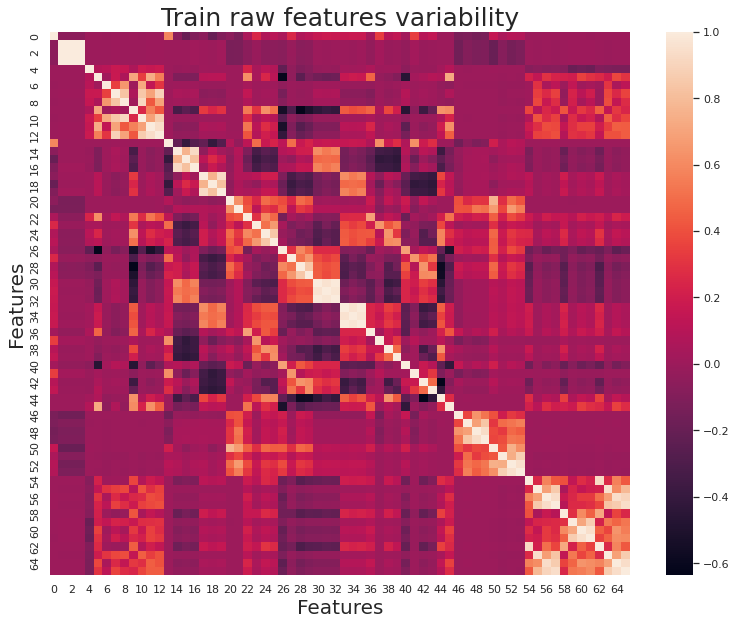

In [29]:
figure, ax = plt.subplots(1, 1, figsize = (13, 10))
ax = sns.heatmap(correlation_df, annot=False)
ax.set_xlabel('Features', fontsize=20)
ax.set_ylabel('Features', fontsize=20)
ax.set_title('Train raw features variability', fontsize=25)
plt.show()

figure.savefig("correlation.png", bbox_inches='tight', dpi=600)

### Multicollinearity exist among features

### 4.2 Analyze each feature variabilities

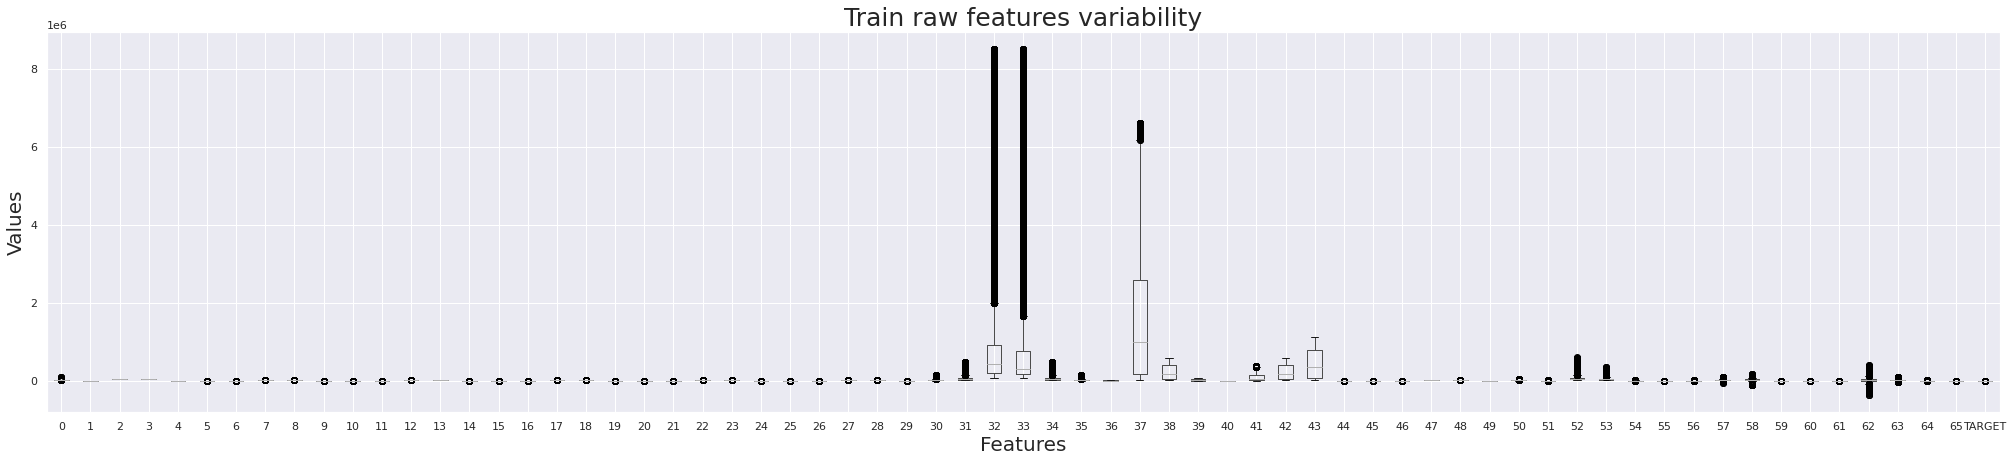

In [30]:
figure, ax = plt.subplots(1, 1, figsize = (35, 7))
train_remove.boxplot()
ax.set_xlabel('Features', fontsize=20)
ax.set_ylabel('Values', fontsize=20)
ax.set_title('Train raw features variability', fontsize=25)

figure.savefig("features_raw_dis.png", bbox_inches='tight', dpi=600)

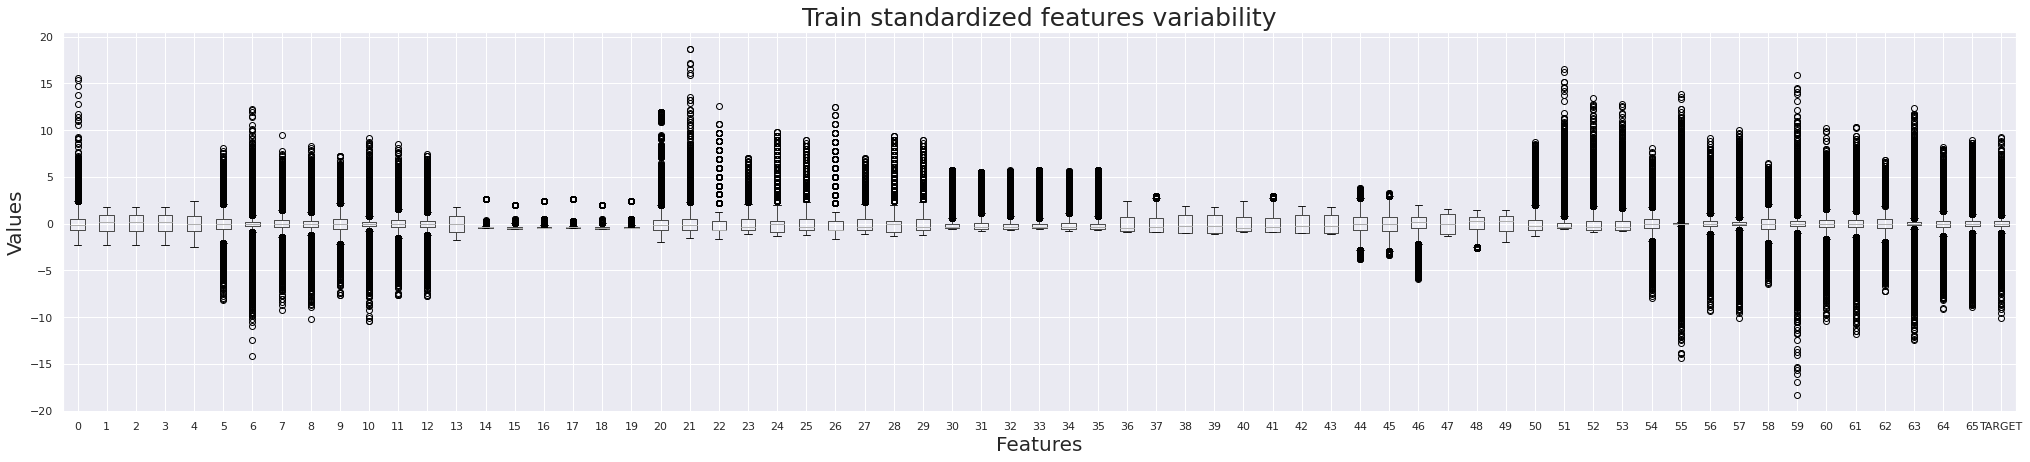

In [31]:
figure, ax = plt.subplots(1, 1, figsize = (35, 7))

train_remove_mean_values = train_remove.mean()
train_remove_std_values = train_remove.std()

train_remove_std = (train_remove-train_remove.mean())/train_remove.std()

train_remove_std.boxplot()
ax.set_xlabel('Features', fontsize=20)
ax.set_ylabel('Values', fontsize=20)
ax.set_title('Train standardized features variability', fontsize=25)

figure.savefig("features_std_dis.png", bbox_inches='tight', dpi=600)

### The devil is in the details, we need to standardize test dataset by using train mean and train standard deviation

In [32]:
test_std = (test-train_remove_mean_values)/train_remove_std_values

In [33]:
# ridge regression
# train
reg = Ridge(alpha=0.04)
reg.fit(train_remove_std.iloc[:, 0:66], train_remove_std.iloc[:, 66])
pred = reg.predict(train_remove_std.iloc[:, 0:66])

# test
pred_test = reg.predict(test_std.iloc[:, 0:66])

train_res = np.sum(train_remove['TARGET'][pred>0])
test_res = np.sum(test['TARGET'][pred_test>0])
print()
print('Ridge regression')
print(f'Maximum sum train return {train_res}, Total train return: {train_max}, Maximum train percentage return: {train_res/train_max*100}%')
print(f'Maximum sum test return {test_res}, Total test return: {test_max}, Maximum test percentage return: {test_res/test_max*100}%')


Ridge regression
Maximum sum train return 24.7929212485, Total train return: 195.6927566509, Maximum train percentage return: 12.66930962229152%
Maximum sum test return 3.6133699862, Total test return: 55.96225182400002, Maximum test percentage return: 6.456798767790768%


### Standardize input features couldn't improve model performance significantly (ridge regression) 

## 4.3 Remove Multicollinearity among features

In [34]:
remove_set = set()
threshold = 0.95
for i in range(66):
    for j in range(i+1, 66):
        if i not in remove_set and correlation_df.iloc[i, j] >=threshold:
            remove_set.add(str(j))
remove_set = list(remove_set)


train_std_noncor = train_remove_std.drop(remove_set, axis=1)
test_std_noncor = test_std.drop(remove_set, axis=1)

In [35]:
print(train_std_noncor.shape)
non_cor_names = list(train_std_noncor.columns.values)
# print(non_cor_names)
non_cor_names.remove('TARGET')
print(non_cor_names)

(89320, 60)
['0', '1', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '33', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65']


In [36]:
# ridge regression
# train
reg = Ridge(alpha=0.04)
reg.fit(train_std_noncor.iloc[:, 0:59], train_std_noncor.iloc[:, 59])

pred = reg.predict(train_std_noncor.iloc[:, 0:59])

# test
pred_test = reg.predict(test_std_noncor.iloc[:, 0:59])

train_res = np.sum(train_remove['TARGET'][pred>0])
test_res = np.sum(test['TARGET'][pred_test>0])

print()
print('Ridge regression')
print(f'Maximum sum train return {train_res}, Total train return: {train_max}, Maximum train percentage return: {train_res/train_max*100}%')
print(f'Maximum sum test return {test_res}, Total test return: {test_max}, Maximum test percentage return: {test_res/test_max*100}%')


Ridge regression
Maximum sum train return 24.4603256455, Total train return: 195.6927566509, Maximum train percentage return: 12.499351567281172%
Maximum sum test return 3.7559956681999997, Total test return: 55.96225182400002, Maximum test percentage return: 6.711659280638882%


### After removing high correlation features, model performance improved by using ridge regression

## 4.4 PCA, UMAP dimension reduction, check if there is linear or nonlinear relationship between features and target

In [37]:
pca = PCA(n_components=2)
pca.fit(train_std_noncor.iloc[:, :-1])
print(pca.explained_variance_ratio_)
train_pca = pca.fit_transform(train_std_noncor.iloc[:, :-1])
reducer = umap.UMAP()
train_umap = reducer.fit_transform(train_std_noncor.iloc[:, :-1])

[0.17547916 0.11141092]


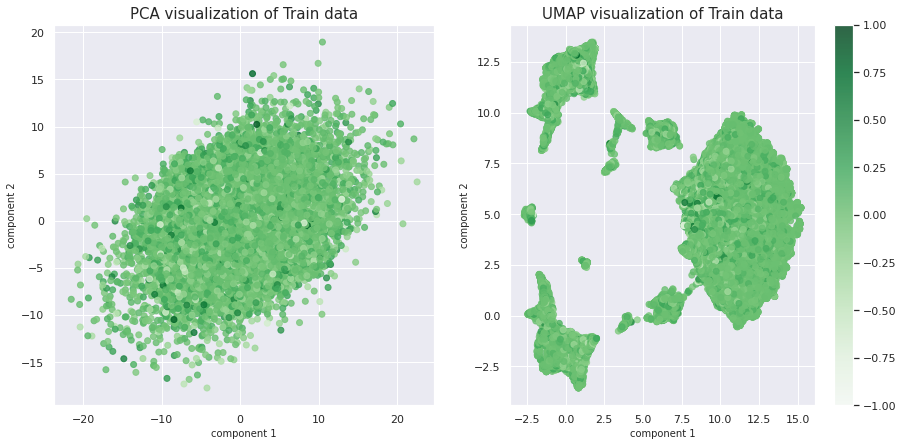

In [38]:
colors = ['red', 'green']
new_inferno = cm.get_cmap('inferno', 5)

figure, ax = plt.subplots(1, 2, figsize = (15, 7))

color_map = (train_std_noncor['TARGET'] - np.min(train_std_noncor['TARGET'])) / (np.max(train_std_noncor['TARGET']) - np.min(train_std_noncor['TARGET']))*2-1

# ax.scatter(train_pca[:, 0], train_pca[:, 1], c=np.sign(train['TARGET']), cmap=matplotlib.colors.ListedColormap(colors))
im_0 = ax[0].scatter(train_pca[:, 0], train_pca[:, 1], c=color_map, cmap='Greens', alpha = 0.8)
im_1 = ax[1].scatter(train_umap[:, 0], train_umap[:, 1], c=color_map, cmap='Greens', alpha = 0.8)

ax[0].set_title('PCA visualization of Train data', fontsize=15)
ax[0].set_xlabel('component 1', fontsize=10)
ax[0].set_ylabel('component 2', fontsize=10)

ax[1].set_title('UMAP visualization of Train data', fontsize=15)
ax[1].set_xlabel('component 1', fontsize=10)
ax[1].set_ylabel('component 2', fontsize=10)
plt.colorbar(im_1)
plt.show()

figure.savefig("train_pca_umap.png", bbox_inches='tight', dpi=600)

In [39]:
pca = PCA(n_components=2)
pca.fit(test_std_noncor.iloc[:, :-1])
print(pca.explained_variance_ratio_)
test_pca = pca.fit_transform(test_std_noncor.iloc[:, :-1])
reducer = umap.UMAP()
test_umap = reducer.fit_transform(test_std_noncor.iloc[:, :-1])

[0.19358459 0.1226209 ]


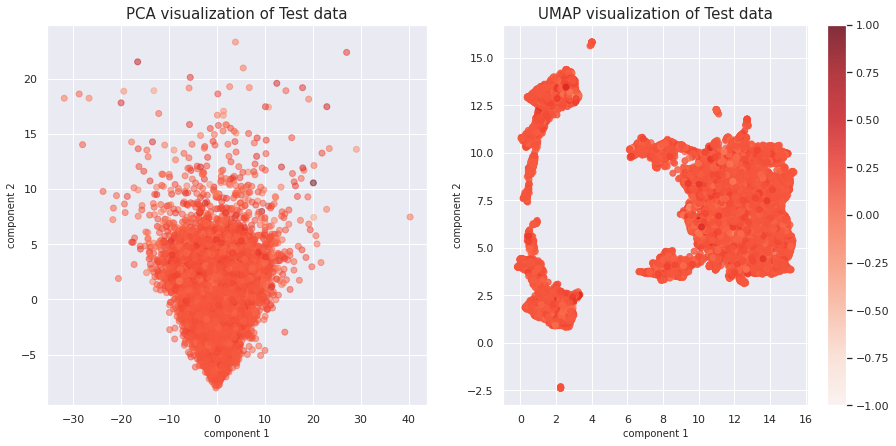

In [40]:
colors = ['red', 'green']
new_inferno = cm.get_cmap('inferno', 5)

figure, ax = plt.subplots(1, 2, figsize = (15, 7))

color_map = (test_std_noncor['TARGET'] - np.min(test_std_noncor['TARGET'])) / (np.max(test_std_noncor['TARGET']) - np.min(test_std_noncor['TARGET']))*2-1

# ax.scatter(train_pca[:, 0], train_pca[:, 1], c=np.sign(train['TARGET']), cmap=matplotlib.colors.ListedColormap(colors))
im_0 = ax[0].scatter(test_pca[:, 0], test_pca[:, 1], c=color_map, cmap='Reds', alpha = 0.5)
im_1 = ax[1].scatter(test_umap[:, 0], test_umap[:, 1], c=color_map, cmap='Reds', alpha = 0.8)

ax[0].set_title('PCA visualization of Test data', fontsize=15)
ax[0].set_xlabel('component 1', fontsize=10)
ax[0].set_ylabel('component 2', fontsize=10)

ax[1].set_title('UMAP visualization of Test data', fontsize=15)
ax[1].set_xlabel('component 1', fontsize=10)
ax[1].set_ylabel('component 2', fontsize=10)
plt.colorbar(im_1)
plt.show()

figure.savefig("test_pca_umap.png", bbox_inches='tight', dpi=600)

# 5. Deeper thought of our data

## 5.1 Check the batch effect between train data and test data

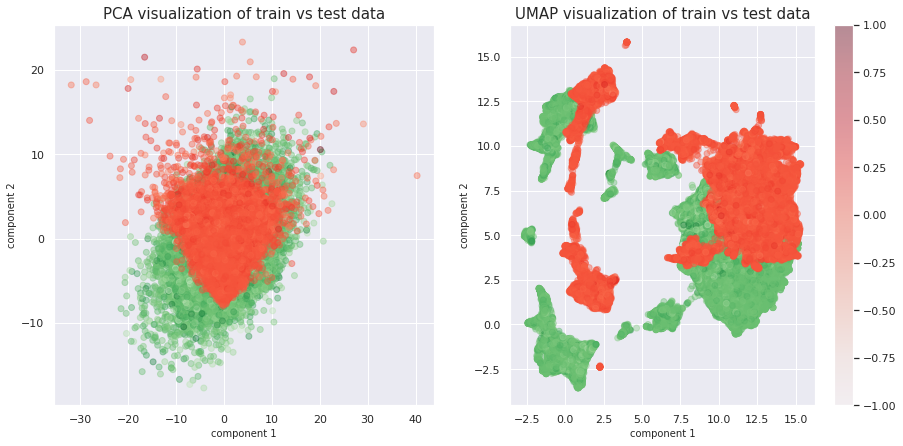

In [41]:
colors = ['red', 'green']
new_inferno = cm.get_cmap('inferno', 5)

figure, ax = plt.subplots(1, 2, figsize = (15, 7))

color_map_train = (train_std_noncor['TARGET'] - np.min(train_std_noncor['TARGET'])) / (np.max(train_std_noncor['TARGET']) - np.min(train_std_noncor['TARGET']))*2-1
im_0 = ax[0].scatter(train_pca[:, 0], train_pca[:, 1], c=color_map_train, cmap='Greens', alpha = 0.4)
im_1 = ax[1].scatter(train_umap[:, 0], train_umap[:, 1], c=color_map_train, cmap='Greens', alpha = 0.4)

color_map_test = (test_std_noncor['TARGET'] - np.min(test_std_noncor['TARGET'])) / (np.max(test_std_noncor['TARGET']) - np.min(test_std_noncor['TARGET']))*2-1
im_0 = ax[0].scatter(test_pca[:, 0], test_pca[:, 1], c=color_map_test, cmap='Reds', alpha = 0.4)
im_1 = ax[1].scatter(test_umap[:, 0], test_umap[:, 1], c=color_map_test, cmap='Reds', alpha = 0.4)

ax[0].set_title('PCA visualization of train vs test data', fontsize=15)
ax[0].set_xlabel('component 1', fontsize=10)
ax[0].set_ylabel('component 2', fontsize=10)

ax[1].set_title('UMAP visualization of train vs test data', fontsize=15)
ax[1].set_xlabel('component 1', fontsize=10)
ax[1].set_ylabel('component 2', fontsize=10)
plt.colorbar(im_1)
plt.show()

figure.savefig("train_test_pca_umap.png", bbox_inches='tight', dpi=600)

### There is the batch effect and some rare samples or even some outliers

## 5.2 Remove the batch effect

### R code

### Seurat CCA integrationn method could find the corresponding relationships between the train data and test data. Also, after integration, clustering the data could be used to construct specific models.

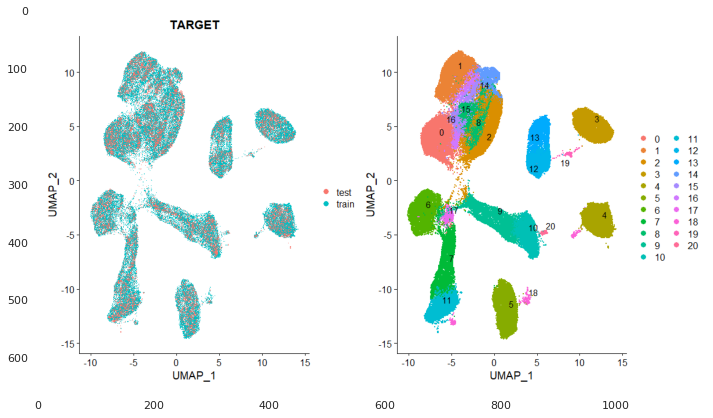

In [42]:
figure, ax = plt.subplots(1, 1, figsize = (15, 7))

inte_seurat = plt.imread('81c2fa23-f223-4c96-9eae-7511f174419a.png')
# plt.figure(figsize=(18, 25))
ax.imshow(inte_seurat)
ax.grid(False)
# ax.show()
figure.savefig("train_test_umap_inte.png", bbox_inches='tight', dpi=600)

## 5.3 Nonlinear transformation

Maximum sum train return 24.4965501486, Total train return: 195.6927566509, Maximum train percentage return: 12.517862473724492%
Maximum sum test return 4.2019530522, Total test return: 55.96225182400002, Maximum test percentage return: 7.508548915106285%


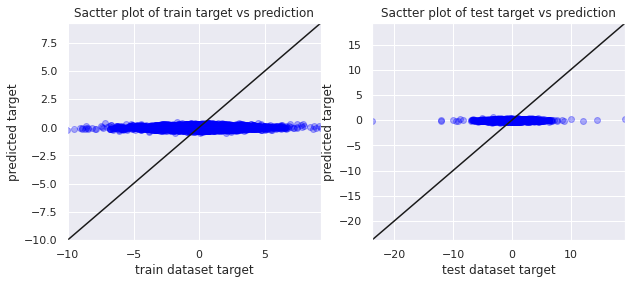

In [43]:
features = [0, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 24, 26, 28, 30, 31, 32, 33, 34, 35, 52, 53, 54, 55, 56, 57, 58, 69, 60, 61, 62, 63, 64, 65]
feature_names = list(train_std_noncor.columns.values)


def sigmoid(x):
    c = 1
    return 1/(1+math.exp(-c*x))

train_sigmoid = train_std_noncor.copy()
for feat in features:
    if str(feat) in feature_names:
        train_sigmoid[str(feat)] = train_sigmoid[str(feat)].apply(sigmoid)

        
test_sigmoid = test_std_noncor.copy()
for feat in features:
    if str(feat) in feature_names:
        test_sigmoid[str(feat)] = test_sigmoid[str(feat)].apply(sigmoid)
        
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

reg = Ridge(alpha=0.04).fit(train_sigmoid.iloc[:, 0:59], train_sigmoid['TARGET'])
# reg = LinearRegression().fit(train_sigmoid.iloc[:, 0:59], train_sigmoid['TARGET'])
pred = reg.predict(train_sigmoid.iloc[:, :59])

pred_test = reg.predict(test_sigmoid.iloc[:, :59])

ax[0].scatter(train_sigmoid['TARGET'], pred, alpha=0.3, c='blue')
max_value = max(max(train_sigmoid['TARGET']), max(pred))
min_value = min(min(train_sigmoid['TARGET']), min(pred))
ax[0].plot([min_value, max_value], [min_value, max_value], 'k-')
ax[0].set_xlim([min_value, max_value])
ax[0].set_ylim([min_value, max_value])
ax[0].set_xlabel('train dataset target')
ax[0].set_ylabel('predicted target')
ax[0].set_title('Sactter plot of train target vs prediction')

ax[1].scatter(test_sigmoid['TARGET'], pred_test, alpha=0.3, c='blue')
max_value = max(max(test_sigmoid['TARGET']), max(pred_test))
min_value = min(min(test_sigmoid['TARGET']), min(pred_test))
ax[1].plot([min_value, max_value], [min_value, max_value], 'k-')
ax[1].set_xlim([min_value, max_value])
ax[1].set_ylim([min_value, max_value])
ax[1].set_xlabel('test dataset target')
ax[1].set_ylabel('predicted target')
ax[1].set_title('Sactter plot of test target vs prediction')

train_res = np.sum(train_remove['TARGET'][pred>0])
test_res = np.sum(test['TARGET'][pred_test>0])

print(f'Maximum sum train return {train_res}, Total train return: {train_max}, Maximum train percentage return: {train_res/train_max*100}%')
print(f'Maximum sum test return {test_res}, Total test return: {test_max}, Maximum test percentage return: {test_res/test_max*100}%')

fig.savefig("train_test_nonlinear.png", bbox_inches='tight', dpi=600)

### Conclusion: Nonlinear transform the data could increase performance

## 5.4 SVM classification

In [44]:
target_range = max(train_std_noncor['TARGET'])-min(train_std_noncor['TARGET'])

threshholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

In [45]:
train_test_results = []
# figure, ax = plt.subplots(2, 6, figsize = (25, 10))
# ax = ax.flatten()

for i in range(3):
    thresh = threshholds[i]
    print('Processing threshold', thresh)
    train_label_ = train_std_noncor['TARGET'] > (max(train_std_noncor['TARGET']) - thresh*target_range)
    test_label_ = test_std_noncor['TARGET'] > (max(train_std_noncor['TARGET']) - thresh*target_range)
    clf = svm.SVC()
    clf.fit(train_std_noncor.iloc[:, 0:59], train_label_)
    train_pred = clf.predict(train_std_noncor.iloc[:, 0:59])
    test_pred = clf.predict(test_std_noncor.iloc[:, 0:59])
    train_test_results.append([thresh, train_pred, test_pred])
    
#     ax[2*i].scatter(train_label_, train_pred, c='blue', alpha = 0.4)
#     ax[2*i].set_title('SVM train result visualization of thresh'+str(thresh), fontsize=15)
#     ax[2*i].set_xlabel('True label', fontsize=10)
#     ax[2*i].set_ylabel('Prediction label', fontsize=10)
    
#     ax[2*i+1].scatter(test_label_, test_pred, c='blue', alpha = 0.4)
#     ax[2*i+1].set_title('SVM test result visualization of thresh'+str(thresh), fontsize=15)
#     ax[2*i+1].set_xlabel('True label', fontsize=10)
#     ax[2*i+1].set_ylabel('Prediction label', fontsize=10)
    
    train_res = np.sum(train_remove['TARGET'][train_pred>0])
    test_res = np.sum(test['TARGET'][test_pred>0])
    
    print(f'Maximum sum train return {train_res}, Total train return: {train_max}, Maximum train percentage return: {train_res/train_max*100}%')
    print(f'Maximum sum test return {test_res}, Total test return: {test_max}, Maximum test percentage return: {test_res/test_max*100}%')

Processing threshold 0.1
Maximum sum train return 0.0, Total train return: 195.6927566509, Maximum train percentage return: 0.0%
Maximum sum test return 0.0, Total test return: 55.96225182400002, Maximum test percentage return: 0.0%
Processing threshold 0.2
Maximum sum train return 0.092169368, Total train return: 195.6927566509, Maximum train percentage return: 0.04709901867467822%
Maximum sum test return 0.0, Total test return: 55.96225182400002, Maximum test percentage return: 0.0%
Processing threshold 0.3
Maximum sum train return 0.443900098, Total train return: 195.6927566509, Maximum train percentage return: 0.22683522149564367%
Maximum sum test return 0.0, Total test return: 55.96225182400002, Maximum test percentage return: 0.0%


### Conclusion: support vector machine method doesn't performa well

## 5.5 Autoencoder Resnet model

In [46]:
input_features = train_remove_std.drop(['TARGET'], axis=1).to_numpy()
output_features = pd.DataFrame((np.sign(train_remove_std['TARGET'])+1)//2).to_numpy()

X_test = test_std.drop(['TARGET'], axis=1).to_numpy()
Y_test = pd.DataFrame((np.sign(test_std['TARGET'])+1)//2).to_numpy()

X_train, X_val, Y_train, Y_val = train_test_split(input_features, output_features, test_size=0.2, random_state=42)

train_data, val_data = train_test_split(train_remove, test_size=0.2, random_state=42)
test_data = test

auto_train_max = np.sum(train_data['TARGET'][train_data['TARGET']>0])
auto_val_max = np.sum(val_data['TARGET'][val_data['TARGET']>0])
auto_test_max = np.sum(test['TARGET'][test['TARGET']>0])

print('Train X shape:', X_train.shape)
print('Validation X shape:', X_val.shape)
print('Train Y shape:', Y_train.shape)
print('Val Y shape:', Y_val.shape)
print('train_max:', auto_train_max)
print('val_max:', auto_val_max)
print('test_max:', auto_test_max)

Train X shape: (71456, 66)
Validation X shape: (17864, 66)
Train Y shape: (71456, 1)
Val Y shape: (17864, 1)
train_max: 153.0990565158
val_max: 38.75009866110001
test_max: 55.96225182400002


In [47]:
train_input = torch.from_numpy(X_train)
train_output = torch.from_numpy(Y_train)
val_input = torch.from_numpy(X_val)
val_output = torch.from_numpy(Y_val)
test_input = torch.from_numpy(X_test)
test_output = torch.from_numpy(Y_test)

train_input = train_input.float()
train_output = train_output.float()
val_input = val_input.float()
val_output = val_output.float()
test_input = test_input.float()
test_output = test_output.float()

input_feature = train_input.shape[1]
output_feature = 1

# print('input_feature:', input_feature)
# print('output_feature:', output_feature)

In [48]:
def seed_everything(seed=1234):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_everything()

In [49]:
# auto-encoder model
# base model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.linear1 = nn.Linear(input_feature, input_feature//2)
        self.linear2 = nn.Linear(input_feature//2, input_feature//4)
        self.linear3 = nn.Linear(input_feature//4, input_feature//16)
        self.linear4 = nn.Linear(input_feature//16, input_feature//16)
        
        self.linear5 = nn.Linear(input_feature//16, input_feature//16)
        self.linear6 = nn.Linear(input_feature//16+input_feature, input_feature//16)
        
        self.batchnorm_1 = nn.BatchNorm1d(input_feature//2)
        self.batchnorm_2 = nn.BatchNorm1d(input_feature//4)
        self.batchnorm_3 = nn.BatchNorm1d(input_feature//16)
        self.linear = nn.Linear(input_feature//16, 2)
        
        nn.init.constant_(self.linear1.weight, 0.1)
        nn.init.constant_(self.linear2.weight, 0.1)
        nn.init.constant_(self.linear3.weight, 0.1)
        nn.init.constant_(self.linear4.weight, 0.1)
        nn.init.constant_(self.linear.weight, 0.1)
        self.relu = nn.ReLU()
#         self.leakyrelu = nn.LeakyReLU(0.1)
        self.dropout = nn.Dropout(0.15)
        
        self.softmax = nn.Softmax()
        

    def forward(self, x_):
        x = self.linear1(x_)
#         x = self.batchnorm_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.linear2(x)
#         x = self.batchnorm_2(x)
        x = self.relu(x)
#         x = self.dropout(x)
        
        x = self.linear3(x)
#         x = self.batchnorm_3(x)
        x = self.relu(x)
        
        x = self.linear4(x)
        x = self.relu(x)
        
        x = self.linear5(x)
        x = self.relu(x)
        
        x = torch.cat((x, x_), 1)
        x = self.linear6(x)
        x = self.relu(x)
        
        output = self.linear(x)
                
        return output.float()

In [50]:
batch_size = 100000
train_ds = TensorDataset(train_input, train_output)
train_dl = DataLoader(train_ds, batch_size= batch_size, shuffle=False)

In [51]:
%matplotlib inline
def fit(num_epochs, model, loss_fn, train_input, train_output, val_input, val_output, test_input, test_output, model_path):
    best_loss = float('inf')
    train_pred_output = []
    val_pred_output = []
    train_error = []
    val_error = []
    test_error = []
    epochs = []
    
    train_returns = []
    val_returns = []
    test_returns = []
    
    train_sum = []
    val_sum = []
    test_sum = []

    for epoch in range(num_epochs):
        for x,y in train_dl:
            model = model.train()
            opt.zero_grad()
            pred = model(x)
#             y = torch.reshape(y, (y.shape[0], 1))
            loss = loss_fn(pred, y.long().squeeze())
            loss.backward()
            opt.step()

        if epoch % 10 == 0:
            
            model = model.eval()
            train_pred = model(train_input)
            train_pred_index = torch.argmax(train_pred, dim=1)
            train_output = torch.reshape(train_output, (train_output.shape[0], 1))
#             train_loss = loss_fn(train_output, train_pred)
            train_loss = loss_fn(train_pred, train_output.long().squeeze())
            train_loss = train_loss.cpu().detach().numpy()
            
            val_pred = model(val_input)
            val_pred_index = torch.argmax(val_pred, dim=1)
            val_output = torch.reshape(val_output, (val_output.shape[0], 1))
#             val_loss = loss_fn(val_output, val_pred)
#             print(val_pred, val_pred_index, val_output)
#             print()
            val_loss = loss_fn(val_pred, val_output.long().squeeze())
            val_loss = val_loss.cpu().detach().numpy()
        
            test_pred = model(test_input)
            test_pred_index = torch.argmax(test_pred, dim=1)
            test_output = torch.reshape(test_output, (test_output.shape[0], 1))
#             val_loss = loss_fn(val_output, val_pred)
            test_loss = loss_fn(test_pred, test_output.long().squeeze())
            test_loss = test_loss.cpu().detach().numpy()
    
            epochs.append(epoch)
            train_error.append(math.log(train_loss+1))
            val_error.append(math.log(val_loss+1))
            test_error.append(math.log(test_loss+1))
            
#             figure, ax = plt.subplots(1, 2, figsize = (20, 7))
#             ax = ax.flatten()
            
#             figure, ax = plt.subplots(1, 4, figsize = (22, 5))
#             ax = ax.flatten()
            
#             plt.grid(False)
            train_conf = confusion_matrix(train_output, train_pred_index)
#             g1 = sns.heatmap(train_conf, cmap="YlGnBu",cbar=False, ax=ax[0], annot = True)
#             g1.set_ylabel('True Target')
#             g1.set_xlabel('Predict Target')
#             g1.set_title('Train dataset')

#             plt.grid(False)
            val_conf = confusion_matrix(val_output, val_pred_index)
#             g2 = sns.heatmap(val_conf, cmap="YlGnBu",cbar=False, ax=ax[1], annot = True)
#             g2.set_ylabel('True Target')
#             g2.set_xlabel('Predict Target')
#             g2.set_title('Val dataset')
            
#             plt.grid(False)
            test_conf = confusion_matrix(test_output, test_pred_index)
#             g3 = sns.heatmap(test_conf, cmap="YlGnBu",cbar=False, ax=ax[2], annot = True)
#             g3.set_ylabel('True Target')
#             g3.set_xlabel('Predict Target')
#             g3.set_title('Test dataset')
            
            train_pred_np = train_pred_index.cpu().detach().numpy()
            train_output_np = train_output.cpu().detach().numpy()
            val_pred_np = val_pred_index.cpu().detach().numpy()
            val_output_np = val_output.cpu().detach().numpy()
            test_pred_np = test_pred_index.cpu().detach().numpy()
            test_output_np = test_output.cpu().detach().numpy()
            
#             train_max_value = max(max(train_output_np), max(train_pred_np))
#             train_min_value = min(min(train_output_np), min(train_pred_np))
#             val_max_value = max(max(val_output_np), max(val_pred_np))
#             val_min_value = min(min(val_output_np), min(val_pred_np))
#             test_max_value = max(max(test_output_np), max(test_pred_np))
#             test_min_value = min(min(test_output_np), min(test_pred_np))
            
#             ax[0].scatter(train_output_np, train_pred_np, s = 20, alpha=0.3, c='blue')
#             ax[1].scatter(val_output_np, val_pred_np, s = 20, alpha=0.3, c='red')
#             ax[2].scatter(test_output_np, test_pred_np, s = 20, alpha=0.3, c='green')
            
#             ax[0].plot(epochs, train_error, c='blue')
#             ax[0].plot(epochs, val_error, c='red')
#             ax[0].plot(epochs, test_error, c='green')
#             ax[0].set_title('Errors vs Epochs', fontsize=15)
#             ax[0].set_xlabel('Epoch', fontsize=10)
#             ax[0].set_ylabel('Errors', fontsize=10)

#             ax[0].legend(['train', 'valid', 'test'])
            
#             ax[0].set_xlim([train_min_value, train_max_value])
#             ax[0].set_ylim([train_min_value, train_max_value])
#             ax[0].set_title('Trainig data', fontsize=15)
#             ax[0].set_xlabel('Target', fontsize=10)
#             ax[0].set_ylabel('Prediction', fontsize=10)
#             ax[0].plot([train_min_value, train_max_value], [train_min_value, train_max_value], 'k-')
            
#             ax[1].set_xlim([val_min_value, val_max_value])
#             ax[1].set_ylim([val_min_value, val_max_value])
#             ax[1].set_title('Validation data', fontsize=15)
#             ax[1].set_xlabel('Target', fontsize=10)
#             ax[1].set_ylabel('Prediction', fontsize=10)
#             ax[1].plot([val_min_value, val_max_value], [val_min_value, val_max_value], 'k-')
            
#             ax[2].set_xlim([test_min_value, test_max_value])
#             ax[2].set_ylim([test_min_value, test_max_value])
#             ax[2].set_title('Testing data', fontsize=15)
#             ax[2].set_xlabel('Target', fontsize=10)
#             ax[2].set_ylabel('Prediction', fontsize=10)
#             ax[2].plot([test_min_value, test_max_value], [test_min_value, test_max_value], 'k-')
            
#             ax[3].plot(epochs, train_error, c='blue')
#             ax[3].plot(epochs, val_error, c='red')
#             ax[3].plot(epochs, test_error, c='green')
#             ax[3].set_title('Training and Validation error', fontsize=15)
#             ax[3].set_xlabel('Epochs', fontsize=10)
#             ax[3].set_ylabel('MSE error', fontsize=10)
            
#             display.clear_output(wait=True)
#             display.display(pl.gcf())
            
#             print('Epoch ', epoch, 'Train_loss: ', train_loss*1000, ' Validation_loss: ', val_loss*100, ' Test_loss: ', test_loss*100)
            
            train_res = np.sum(train_data['TARGET'][train_pred_np>0])
            val_res = np.sum(val_data['TARGET'][val_pred_np>0])
            test_res = np.sum(test_data['TARGET'][test_pred_np>0])
            
#             train_returns.append(train_res)
#             val_returns.append(val_res)
#             test_returns.append(test_res)
            
#             ax[1].plot(epochs, train_returns, c='blu`e')
#             ax[1].plot(epochs, val_returns, c='red')
#             ax[1].plot(epochs, test_returns, c='green')
#             ax[1].legend(['train', 'valid', 'test'])
#             ax[1].set_title('Return vs Epochs', fontsize=15)
#             ax[1].set_xlabel('Epoch', fontsize=10)
#             ax[1].set_ylabel('Returns', fontsize=10)

#             display.clear_output(wait=True)
#             display.display(pl.gcf())
            
            train_sum.append(train_res)
            val_sum.append(val_res)
            test_sum.append(test_res)
            
#             print(f'Maximum sum train return {train_res}, Total train return: {auto_train_max}, Maximum train percentage return: {train_res/auto_train_max*100}%')
#             print(f'Maximum sum train return {val_res}, Total train return: {auto_val_max}, Maximum train percentage return: {val_res/auto_val_max*100}%')
#             print(f'Maximum sum test return {test_res}, Total test return: {auto_test_max}, Maximum test percentage return: {test_res/auto_test_max*100}%')
#             print('Epoch:', epoch, 'Train loss:', train_loss, 'Val loss:', val_loss, 'Test loss:', test_loss)
            print(f'Epoch: {epoch}, Train loss: {train_loss}, Train return: {train_res/auto_train_max*100}%, Val loss: {val_loss}, Val return: {val_res/auto_val_max*100}%, Test loss: {test_loss}, Test return: {test_res/auto_test_max*100}%')
        
            if val_loss < best_loss:
                torch.save(model.state_dict(), model_path)
                best_loss = val_loss
                
#             train_pred_output.append([train_pred.cpu().detach().numpy(), train_output.cpu().detach().numpy()])
#             val_pred_output.append([val_pred.cpu().detach().numpy(), val_output.cpu().detach().numpy()])
    return train_sum, val_sum, test_sum, train_conf, val_conf, test_conf


In [52]:
num_epochs = 100
learning_rate = 0.001
# loss_fn = F.mse_loss
loss_fn = nn.CrossEntropyLoss()

seed_everything()

model = Autoencoder()
opt = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
train_sum_1, val_sum_1, test_sum_1, train_conf_1, val_conf_1, test_conf_1 = fit(num_epochs, model, loss_fn, train_input, train_output, val_input, val_output, test_input, test_output, 'model_path_1')
# fig.savefig("auto_encoder.png", bbox_inches='tight', dpi=600)

Epoch: 0, Train loss: 0.6933268904685974, Train return: 0.0%, Val loss: 0.6934733986854553, Val return: 0.0%, Test loss: 0.6932880282402039, Test return: 0.0%
Epoch: 10, Train loss: 0.6933140158653259, Train return: 0.0%, Val loss: 0.6934536695480347, Val return: 0.0%, Test loss: 0.6932775974273682, Test return: 0.0%
Epoch: 20, Train loss: 0.6932929754257202, Train return: 0.0%, Val loss: 0.6934210658073425, Val return: 0.0%, Test loss: 0.6932607889175415, Test return: 0.0%
Epoch: 30, Train loss: 0.6932709217071533, Train return: 0.0%, Val loss: 0.6933861374855042, Val return: 0.0%, Test loss: 0.6932436227798462, Test return: 0.0%
Epoch: 40, Train loss: 0.6932501792907715, Train return: 0.0%, Val loss: 0.6933525800704956, Val return: 0.0%, Test loss: 0.6932275891304016, Test return: 0.0007470625044089207%
Epoch: 50, Train loss: 0.693231463432312, Train return: -0.024904485284052088%, Val loss: 0.6933214068412781, Val return: -0.09479881153664452%, Test loss: 0.6932134032249451, Test re

In [53]:
# model = Autoencoder_model()
# model.load_state_dict(torch.load(model_path))
# model.eval()

In [54]:
def sigmoid(x):
    c = 1
    return 1/(1+math.exp(-c*x))

train_sigmoid = train_remove_std.copy()
for feat in features:
    if str(feat) in feature_names:
        train_sigmoid[str(feat)] = train_sigmoid[str(feat)].apply(sigmoid)

        
test_sigmoid = test_std.copy()
for feat in features:
    if str(feat) in feature_names:
        test_sigmoid[str(feat)] = test_sigmoid[str(feat)].apply(sigmoid)
        

In [55]:
input_features = train_sigmoid.drop(['TARGET'], axis=1).to_numpy()
output_features = pd.DataFrame((np.sign(train_remove_std['TARGET'])+1)//2).to_numpy()

X_test = test_sigmoid.drop(['TARGET'], axis=1).to_numpy()
Y_test = pd.DataFrame((np.sign(test_std['TARGET'])+1)//2).to_numpy()

X_train, X_val, Y_train, Y_val = train_test_split(input_features, output_features, test_size=0.2, random_state=42)

train_data, val_data = train_test_split(train_remove, test_size=0.2, random_state=42)
test_data = test

auto_train_max = np.sum(train_data['TARGET'][train_data['TARGET']>0])
auto_val_max = np.sum(val_data['TARGET'][val_data['TARGET']>0])
auto_test_max = np.sum(test['TARGET'][test['TARGET']>0])

print('Train X shape:', X_train.shape)
print('Validation X shape:', X_val.shape)
print('test X shape:', X_test.shape)
print('Train Y shape:', Y_train.shape)
print('Val Y shape:', Y_val.shape)
print('Test Y shape:', Y_test.shape)

print()
print('train_max:', auto_train_max)
print('val_max:', auto_val_max)
print('test_max:', auto_test_max)

Train X shape: (71456, 66)
Validation X shape: (17864, 66)
test X shape: (19707, 66)
Train Y shape: (71456, 1)
Val Y shape: (17864, 1)
Test Y shape: (19707, 1)

train_max: 153.0990565158
val_max: 38.75009866110001
test_max: 55.96225182400002


In [56]:
train_input = torch.from_numpy(X_train)
train_output = torch.from_numpy(Y_train)
val_input = torch.from_numpy(X_val)
val_output = torch.from_numpy(Y_val)
test_input = torch.from_numpy(X_test)
test_output = torch.from_numpy(Y_test)

train_input = train_input.float()
train_output = train_output.float()
val_input = val_input.float()
val_output = val_output.float()
test_input = test_input.float()
test_output = test_output.float()

input_feature = train_input.shape[1]
output_feature = 1

print('input_feature:', input_feature)
print('output_feature:', output_feature)

input_feature: 66
output_feature: 1


In [57]:
num_epochs = 100
learning_rate = 0.01
# loss_fn = F.mse_loss
loss_fn = nn.CrossEntropyLoss()

seed_everything()

model = Autoencoder()
opt = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
train_sum_2, val_sum_2, test_sum_2, train_conf_2, val_conf_2, test_conf_2 = fit(num_epochs, model, loss_fn, train_input, train_output, val_input, val_output, test_input, test_output, 'model_path_2')

Epoch: 0, Train loss: 0.6933242082595825, Train return: 0.0%, Val loss: 0.693469226360321, Val return: 0.0%, Test loss: 0.6932856440544128, Test return: 0.0%
Epoch: 10, Train loss: 0.6932119131088257, Train return: -0.002886850579346239%, Val loss: 0.6932803988456726, Val return: 0.1964954429301536%, Test loss: 0.6931908130645752, Test return: 0.08761511805172278%
Epoch: 20, Train loss: 0.6931112408638, Train return: -1.6556311834217023%, Val loss: 0.6930745840072632, Val return: 1.626373141941631%, Test loss: 0.6931192278862, Test return: -2.2644221479603486%
Epoch: 30, Train loss: 0.6930712461471558, Train return: -1.6410803817988973%, Val loss: 0.6929574608802795, Val return: 1.5330254131620087%, Test loss: 0.6931018829345703, Test return: -2.3250614430100267%
Epoch: 40, Train loss: 0.693054735660553, Train return: -1.6410803817988973%, Val loss: 0.6928999423980713, Val return: 1.5330254131620087%, Test loss: 0.6930962204933167, Test return: -2.1677537040776094%
Epoch: 50, Train los

In [58]:
# model = Autoencoder_model()
# model.load_state_dict(torch.load(model_path))
# model.eval()

## Further data exploration

In [59]:
train_positive = train_remove_std[train_remove['TARGET']>0]
train_negative = train_remove_std[train_remove['TARGET']<0]

train_positive_np = np.zeros((train_positive.shape[0], 11, 6))
train_negative_np = np.zeros((train_negative.shape[0], 11, 6))

for i in range(train_positive.shape[0]):
    train_positive_np[i, :, :] = np.reshape(train_positive.iloc[i, :-1].to_numpy(), (11, 6))
for i in range(train_negative.shape[0]):
    train_negative_np[i, :, :] = np.reshape(train_negative.iloc[i, :-1].to_numpy(), (11, 6))

In [60]:
# for i in range(train_positive_np.shape[0]):
#     figure, ax = plt.subplots(1, 1, figsize = (5, 5))
#     g = sns.heatmap(train_positive_np[i, :, :], cmap="YlGnBu",cbar=False, ax=ax, annot = True)
#     figure.savefig('train_positive/train_' + str(i) + '.png', bbox_inches='tight', dpi=600)
# display.clear_output(wait=True)
# display.display(pl.gcf())

# for i in range(train_negative_np.shape[0]):
#     figure, ax = plt.subplots(1, 1, figsize = (5, 5))
#     g = sns.heatmap(train_negative_np[i, :, :], cmap="YlGnBu",cbar=False, ax=ax, annot = True)
#     figure.savefig('train_negative/train_' + str(i) + '.png', bbox_inches='tight', dpi=600)
# display.clear_output(wait=True)
# display.display(pl.gcf())

In [62]:
test_positive = test_std[test_std['TARGET']>0]
test_negative = test_std[test_std['TARGET']<0]

test_positive_np = np.zeros((test_positive.shape[0], 11, 6))
test_negative_np = np.zeros((test_negative.shape[0], 11, 6))

for i in range(test_positive.shape[0]):
    test_positive_np[i, :, :] = np.reshape(test_positive.iloc[i, :-1].to_numpy(), (11, 6))
for i in range(test_negative.shape[0]):
    test_negative_np[i, :, :] = np.reshape(test_negative.iloc[i, :-1].to_numpy(), (11, 6))

In [63]:
# for i in range(test_positive_np.shape[0]):
#     figure, ax = plt.subplots(1, 1, figsize = (5, 5))
#     g = sns.heatmap(test_positive_np[i, :, :], cmap="YlGnBu",cbar=False, ax=ax, annot = True)
#     figure.savefig('test_positive/test_' + str(i) + '.png', bbox_inches='tight', dpi=600)
# display.clear_output(wait=True)
# display.display(pl.gcf())

# for i in range(test_negative_np.shape[0]):
#     figure, ax = plt.subplots(1, 1, figsize = (5, 5))
#     g = sns.heatmap(test_negative_np[i, :, :], cmap="YlGnBu",cbar=False, ax=ax, annot = True)
#     figure.savefig('test_negative/test_' + str(i) + '.png', bbox_inches='tight', dpi=600)
# display.clear_output(wait=True)
# display.display(pl.gcf())

In [101]:
train_positive = (train_positive-train_positive.min())/(train_positive.max()-train_positive.min()).to_numpy()
train_negative = (train_negative-train_negative.min())/(train_negative.max()-train_negative.min()).to_numpy()

test_positive = (test_positive-test_positive.min())/(test_positive.max()-test_positive.min()).to_numpy()
test_negative = (test_negative-test_negative.min())/(test_negative.max()-test_negative.min()).to_numpy()

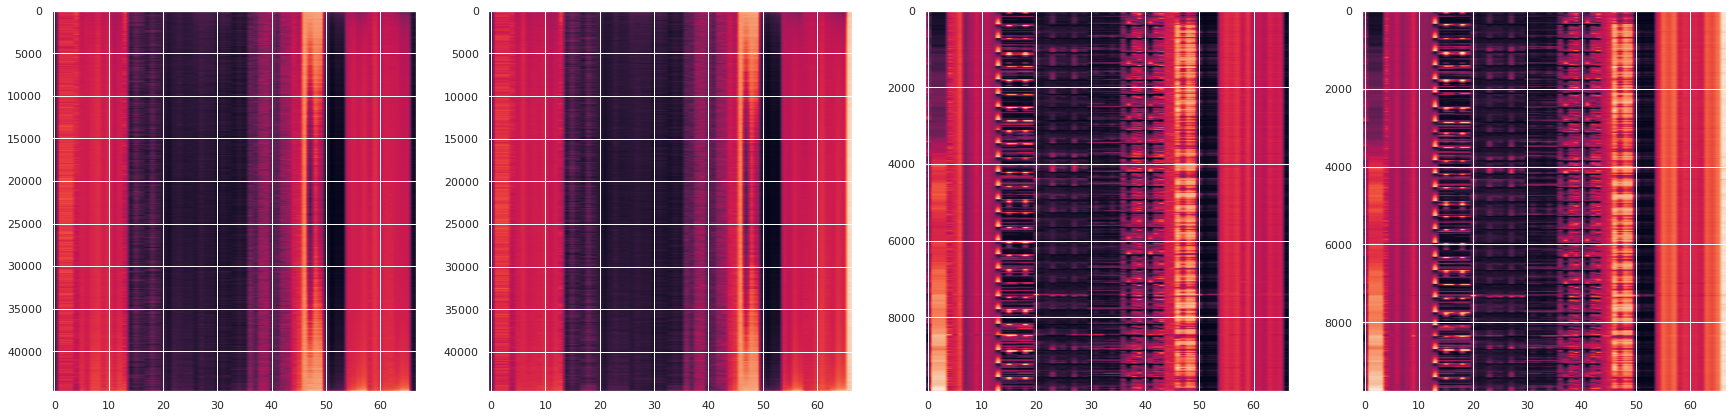

In [102]:
figure, ax = plt.subplots(1, 4, figsize = (30, 7))
ax = ax.flatten()

ax[0].imshow(train_positive.to_numpy()[:, :], aspect = 'auto')
ax[1].imshow(train_negative.to_numpy()[:, :], aspect = 'auto')
ax[2].imshow(test_positive.to_numpy()[:, :], aspect = 'auto')
ax[3].imshow(test_negative.to_numpy()[:, :], aspect = 'auto')

plt.show()

In [126]:
pca = PCA(n_components=2)
pca.fit(train_positive.iloc[:, :-1])

train_positive_pca = pca.fit_transform(train_positive.iloc[:, :-1])
reducer = umap.UMAP()
train_positive_umap = reducer.fit_transform(train_positive.iloc[:, :-1])

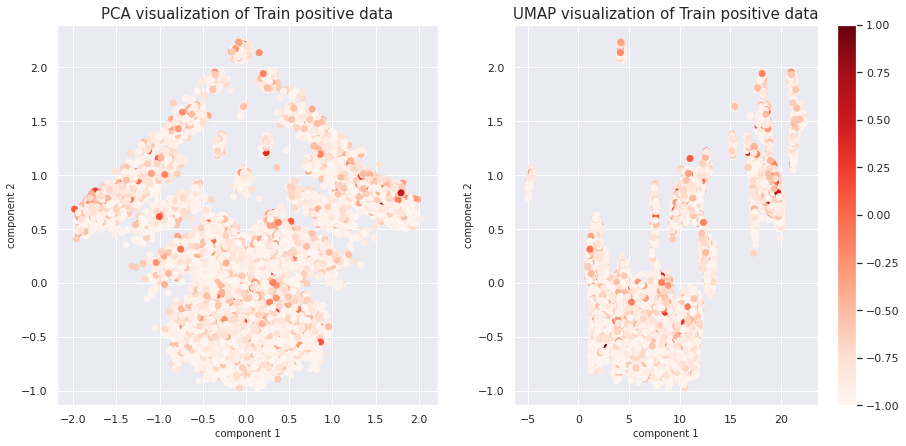

In [127]:
colors = ['red', 'green']
new_inferno = cm.get_cmap('inferno', 5)

figure, ax = plt.subplots(1, 2, figsize = (15, 7))

color_map = (train_positive['TARGET'] - np.min(train_positive['TARGET'])) / (np.max(train_positive['TARGET']) - np.min(train_positive['TARGET']))*2-1

# ax.scatter(train_pca[:, 0], train_pca[:, 1], c=np.sign(train['TARGET']), cmap=matplotlib.colors.ListedColormap(colors))
im_0 = ax[0].scatter(train_positive_pca[:, 0], train_positive_pca[:, 1], c=color_map, cmap='Reds', alpha = 1)
im_1 = ax[1].scatter(train_positive_umap[:, 0], train_positive_pca[:, 1], c=color_map, cmap='Reds', alpha = 1)

ax[0].set_title('PCA visualization of Train positive data', fontsize=15)
ax[0].set_xlabel('component 1', fontsize=10)
ax[0].set_ylabel('component 2', fontsize=10)

ax[1].set_title('UMAP visualization of Train positive data', fontsize=15)
ax[1].set_xlabel('component 1', fontsize=10)
ax[1].set_ylabel('component 2', fontsize=10)
plt.colorbar(im_1)
plt.show()

figure.savefig("train_positive_pca_umap.png", bbox_inches='tight', dpi=600)

In [128]:
pca = PCA(n_components=2)
pca.fit(train_negative.iloc[:, :-1])

train_negative_pca = pca.fit_transform(train_negative.iloc[:, :-1])
reducer = umap.UMAP()
train_negative_umap = reducer.fit_transform(train_negative.iloc[:, :-1])

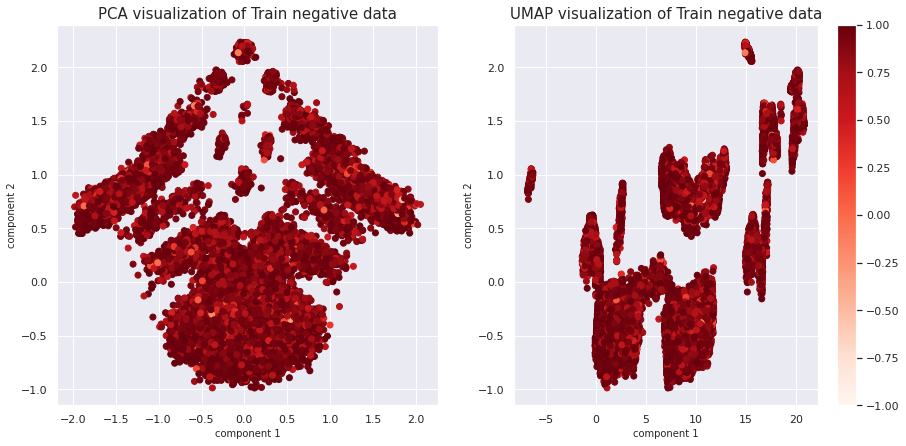

In [129]:
colors = ['red', 'green']
new_inferno = cm.get_cmap('inferno', 5)

figure, ax = plt.subplots(1, 2, figsize = (15, 7))

color_map = (train_negative['TARGET'] - np.min(train_negative['TARGET'])) / (np.max(train_negative['TARGET']) - np.min(train_negative['TARGET']))*2-1

# ax.scatter(train_pca[:, 0], train_pca[:, 1], c=np.sign(train['TARGET']), cmap=matplotlib.colors.ListedColormap(colors))
im_0 = ax[0].scatter(train_negative_pca[:, 0], train_negative_pca[:, 1], c=color_map, cmap='Reds', alpha = 1)
im_1 = ax[1].scatter(train_negative_umap[:, 0], train_negative_pca[:, 1], c=color_map, cmap='Reds', alpha = 1)

ax[0].set_title('PCA visualization of Train negative data', fontsize=15)
ax[0].set_xlabel('component 1', fontsize=10)
ax[0].set_ylabel('component 2', fontsize=10)

ax[1].set_title('UMAP visualization of Train negative data', fontsize=15)
ax[1].set_xlabel('component 1', fontsize=10)
ax[1].set_ylabel('component 2', fontsize=10)
plt.colorbar(im_1)
plt.show()

figure.savefig("train_negative_pca_umap.png", bbox_inches='tight', dpi=600)

In [130]:
pca = PCA(n_components=2)
pca.fit(test_positive.iloc[:, :-1])

test_positive_pca = pca.fit_transform(test_positive.iloc[:, :-1])
reducer = umap.UMAP()
test_positive_umap = reducer.fit_transform(test_positive.iloc[:, :-1])

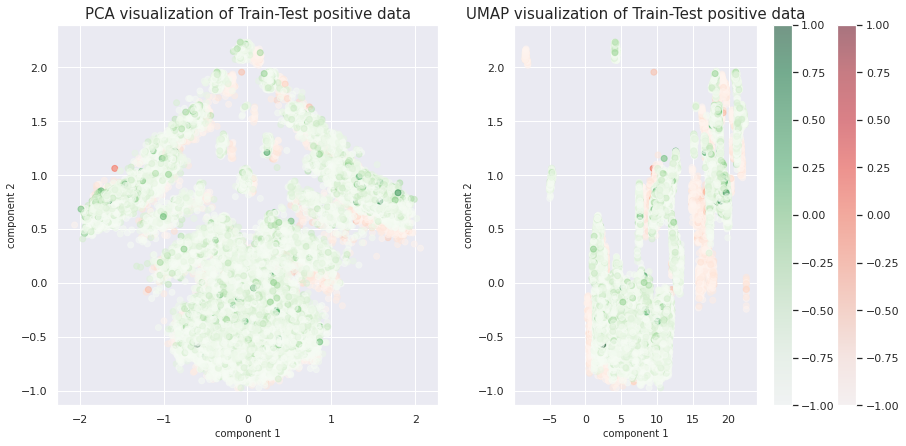

In [152]:
colors = ['red', 'green']
new_inferno = cm.get_cmap('inferno', 5)

figure, ax = plt.subplots(1, 2, figsize = (15, 7))

color_map = (test_positive['TARGET'] - np.min(test_positive['TARGET'])) / (np.max(test_positive['TARGET']) - np.min(test_positive['TARGET']))*2-1

color_map_train = (train_positive['TARGET'] - np.min(train_positive['TARGET'])) / (np.max(train_positive['TARGET']) - np.min(train_positive['TARGET']))*2-1

# ax.scatter(train_pca[:, 0], train_pca[:, 1], c=np.sign(train['TARGET']), cmap=matplotlib.colors.ListedColormap(colors))
im_0 = ax[0].scatter(test_positive_pca[:, 0], test_positive_pca[:, 1], c=color_map, cmap='Reds', alpha = 0.5)
im_1 = ax[1].scatter(test_positive_umap[:, 0], test_positive_pca[:, 1], c=color_map, cmap='Reds', alpha = 0.5)
plt.colorbar(im_0)

im_0 = ax[0].scatter(train_positive_pca[:, 0], train_positive_pca[:, 1], c=color_map_train, cmap='Greens', alpha = 0.5)
im_1 = ax[1].scatter(train_positive_umap[:, 0], train_positive_pca[:, 1], c=color_map_train, cmap='Greens', alpha = 0.5)

ax[0].set_title('PCA visualization of Train-Test positive data', fontsize=15)
ax[0].set_xlabel('component 1', fontsize=10)
ax[0].set_ylabel('component 2', fontsize=10)

ax[1].set_title('UMAP visualization of Train-Test positive data', fontsize=15)
ax[1].set_xlabel('component 1', fontsize=10)
ax[1].set_ylabel('component 2', fontsize=10)
plt.colorbar(im_1)
plt.show()

figure.savefig("test_positive_pca_umap.png", bbox_inches='tight', dpi=600)

In [132]:
pca = PCA(n_components=2)
pca.fit(test_negative.iloc[:, :-1])

test_negative_pca = pca.fit_transform(test_negative.iloc[:, :-1])
reducer = umap.UMAP()
test_negative_umap = reducer.fit_transform(test_negative.iloc[:, :-1])

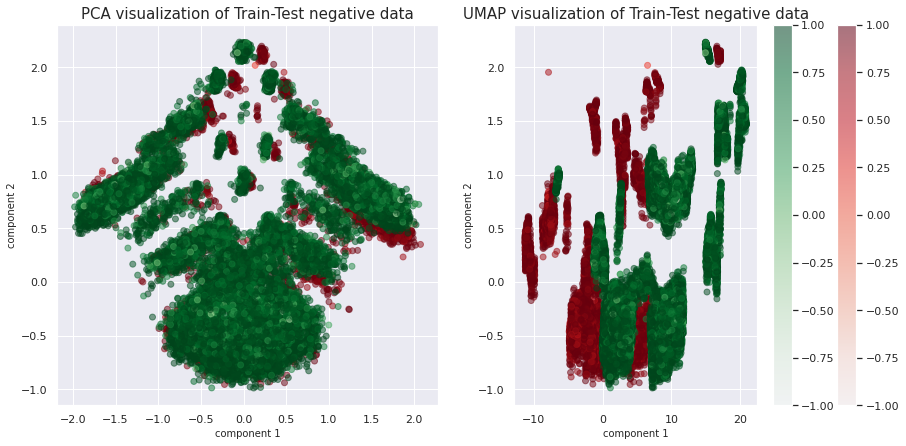

In [150]:
colors = ['red', 'green']
new_inferno = cm.get_cmap('inferno', 5)

figure, ax = plt.subplots(1, 2, figsize = (15, 7))

color_map = (test_negative['TARGET'] - np.min(test_negative['TARGET'])) / (np.max(test_negative['TARGET']) - np.min(test_negative['TARGET']))*2-1
color_map_train = (train_negative['TARGET'] - np.min(train_negative['TARGET'])) / (np.max(train_negative['TARGET']) - np.min(train_negative['TARGET']))*2-1

# ax.scatter(train_pca[:, 0], train_pca[:, 1], c=np.sign(train['TARGET']), cmap=matplotlib.colors.ListedColormap(colors))
im_0 = ax[0].scatter(test_negative_pca[:, 0], test_negative_pca[:, 1], c=color_map, cmap='Reds', alpha = 0.5)
im_1 = ax[1].scatter(test_negative_umap[:, 0], test_negative_pca[:, 1], c=color_map, cmap='Reds', alpha = 0.5)
plt.colorbar(im_0)
im_0 = ax[0].scatter(train_negative_pca[:, 0], train_negative_pca[:, 1], c=color_map_train, cmap='Greens', alpha = 0.5)
im_1 = ax[1].scatter(train_negative_umap[:, 0], train_negative_pca[:, 1], c=color_map_train, cmap='Greens', alpha = 0.5)

ax[0].set_title('PCA visualization of Train-Test negative data', fontsize=15)
ax[0].set_xlabel('component 1', fontsize=10)
ax[0].set_ylabel('component 2', fontsize=10)

ax[1].set_title('UMAP visualization of Train-Test negative data', fontsize=15)
ax[1].set_xlabel('component 1', fontsize=10)
ax[1].set_ylabel('component 2', fontsize=10)

plt.colorbar(im_1)
plt.show()

figure.savefig("test_negative_pca_umap.png", bbox_inches='tight', dpi=600)

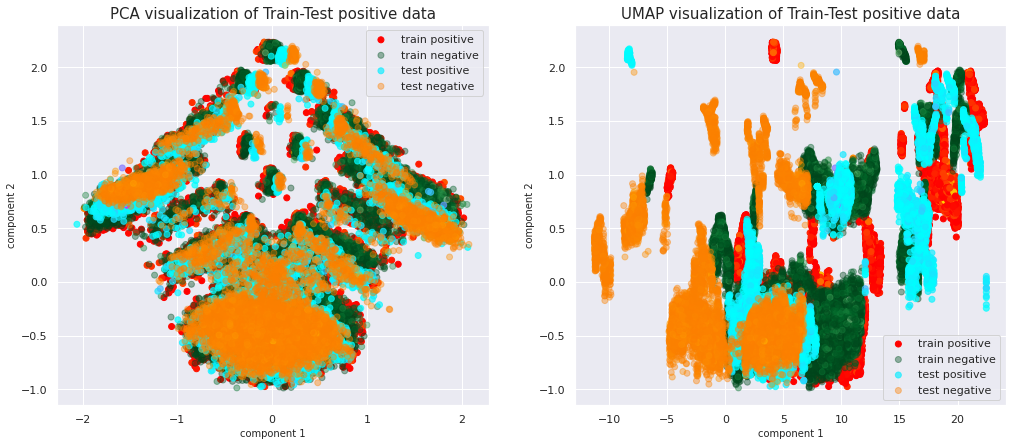

In [178]:
colors = ['red', 'green']
new_inferno = cm.get_cmap('inferno', 5)

figure, ax = plt.subplots(1, 2, figsize = (17, 7))

color_map_train_pos = (train_positive['TARGET'] - np.min(train_positive['TARGET'])) / (np.max(train_positive['TARGET']) - np.min(train_positive['TARGET']))*2-1

color_map_train_neg = (train_negative['TARGET'] - np.min(train_negative['TARGET'])) / (np.max(train_negative['TARGET']) - np.min(train_negative['TARGET']))*2-1

color_map_test_pos = (test_positive['TARGET'] - np.min(test_positive['TARGET'])) / (np.max(test_positive['TARGET']) - np.min(test_positive['TARGET']))*2-1

color_map_test_neg = (test_negative['TARGET'] - np.min(test_negative['TARGET'])) / (np.max(test_negative['TARGET']) - np.min(test_negative['TARGET']))*2-1

# ax.scatter(train_pca[:, 0], train_pca[:, 1], c=np.sign(train['TARGET']), cmap=matplotlib.colors.ListedColormap(colors))
ax[0].scatter(train_positive_pca[:, 0], train_positive_pca[:, 1], c=color_map_train_pos, cmap='autumn', alpha = 1, label = 'train positive')
ax[1].scatter(train_positive_umap[:, 0], train_positive_pca[:, 1], c=color_map_train_pos, cmap='autumn', alpha = 1, label = 'train positive')

ax[0].scatter(train_negative_pca[:, 0], train_negative_pca[:, 1], c=color_map_train_neg, cmap='Greens', alpha = 0.4, label = 'train negative')
ax[1].scatter(train_negative_umap[:, 0], train_negative_pca[:, 1], c=color_map_train_neg, cmap='Greens', alpha = 0.4, label = 'train negative')

ax[0].scatter(test_positive_pca[:, 0], test_positive_pca[:, 1], c=color_map_test_pos, cmap='cool', alpha = 0.7, label = 'test positive')
ax[1].scatter(test_positive_umap[:, 0], test_positive_pca[:, 1], c=color_map_test_pos, cmap='cool', alpha = 0.7, label = 'test positive')

ax[0].scatter(test_negative_pca[:, 0], test_negative_pca[:, 1], c=color_map_test_neg, cmap='Wistia', alpha = 0.4, label = 'test negative')
ax[1].scatter(test_negative_umap[:, 0], test_negative_pca[:, 1], c=color_map_test_neg, cmap='Wistia', alpha = 0.4, label = 'test negative')

# ax[0].legend(['train positive', 'train negative', 'test positive', 'test negative'])
# ax[1].legend(['train positive', 'train negative', 'test positive', 'test negative'])

ax[0].set_title('PCA visualization of Train-Test positive data', fontsize=15)
ax[0].set_xlabel('component 1', fontsize=10)
ax[0].set_ylabel('component 2', fontsize=10)

ax[1].set_title('UMAP visualization of Train-Test positive data', fontsize=15)
ax[1].set_xlabel('component 1', fontsize=10)
ax[1].set_ylabel('component 2', fontsize=10)

ax[0].legend()
ax[1].legend()

plt.show()

figure.savefig("train_test_pca_umap.png", bbox_inches='tight', dpi=600)